<a href="https://colab.research.google.com/github/Dileepsingh6432/Cardivascular-Risk-Prediction-Classification-/blob/main/Cardivascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 -** - Dileep Singh
##### **Team Member 2 -** - Vishal Singh
##### **Team Member 3 -** - Mohammad Irfan

# **Project Summary -**

**This project aims to use data from the ongoing cardiovascular study on residents of Framingham, Massachusetts to predict the 10-year risk of future coronary heart disease (CHD) for patients. The dataset consists of over 4,000 records and 15 attributes, including demographic, behavioral, and medical risk factors. The goal of this project is to develop a predictive model that accurately classifies patients based on their risk of CHD.**

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Despite advances in medical technology, coronary heart disease remains a leading cause of death worldwide. The early detection of CHD risk is crucial for preventing and mitigating its impact. The current cardiovascular study on the residents of Framingham, Massachusetts provides an opportunity to use data to identify patients at risk of CHD. However, with over 4,000 records and 15 attributes, it is difficult to manually identify patients who are at high risk. This project aims to address this challenge by developing a predictive model that accurately classifies patients based on their risk of CHD. This will help to improve the early detection and prevention of CHD, reducing its impact on patients and the healthcare system.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

import warnings    
warnings.filterwarnings('ignore')

plt.rcParams.update({'figure.figsize':(8,6),'figure.dpi':100})


# Import Libraries

from numpy import math
from numpy import loadtxt
from matplotlib import rcParams
!pip install pymysql
import pymysql
from sqlalchemy import create_engine
from sqlalchemy.pool import NullPool

from scipy.stats import *
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from sklearn.tree import export_graphviz

!pip install shap==0.40.0
import shap 
import graphviz
sns.set_style('darkgrid') 

import warnings
warnings.filterwarnings('ignore')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset

filepath ='/content/drive/MyDrive/data_cardiovascular_risk.csv'
df = pd.read_csv(filepath)

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print('The number of rows in data is:',df.shape[0])
print('The number of columns in data is',len(list(df.columns)))

The number of rows in data is: 3390
The number of columns in data is 17


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
# df.duplicated().sum()
duplicate_rows_in_store_data = df.duplicated().sum()
print('The number of duplicates in store data is:',duplicate_rows_in_store_data)

The number of duplicates in store data is: 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

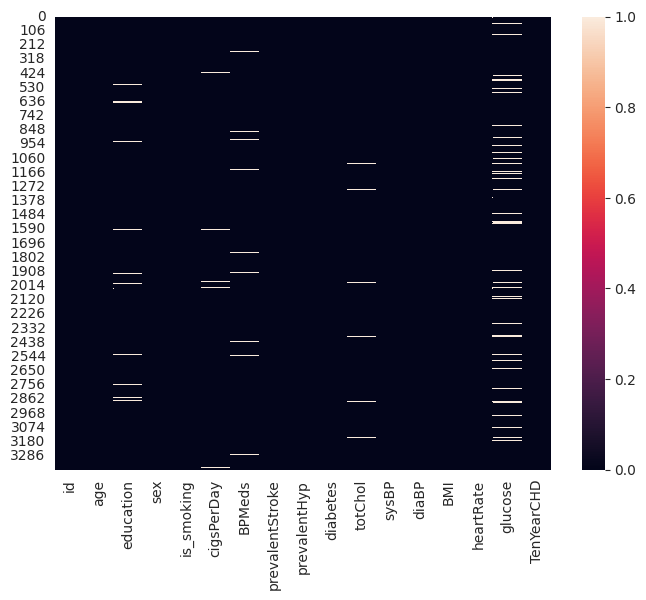

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=True)

### What did you know about your dataset?

This dataset contains many features which has null values. As we see, there are lots of null values in 'glucose' column. The features 'education', 'cigsPerDay', 'BPMeds', and 'totChol' also has missing values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(list(df.columns))

['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']


In [ ]:
# Dataset Describe
df.describe()


id          age    education   cigsPerDay       BPMeds  \
count  3390.000000  3390.000000  3303.000000  3368.000000  3346.000000   
mean   1694.500000    49.542183     1.970936     9.069477     0.029886   
std     978.753033     8.592878     1.019081    11.879078     0.170299   
min       0.000000    32.000000     1.000000     0.000000     0.000000   
25%     847.250000    42.000000     1.000000     0.000000     0.000000   
50%    1694.500000    49.000000     2.000000     0.000000     0.000000   
75%    2541.750000    56.000000     3.000000    20.000000     0.000000   
max    3389.000000    70.000000     4.000000    70.000000     1.000000   

       prevalentStroke  prevalentHyp     diabetes      totChol       sysBP  \
count      3390.000000   3390.000000  3390.000000  3352.000000  3390.00000   
mean          0.006490      0.315339     0.025664   237.074284   132.60118   
std           0.080309      0.464719     0.158153    45.247430    22.29203   
min           0.000000      0.000000     0.000000   107.000000    83.50000   
25%           0.000000      0.000000     0.000000   206.000000   117.00000   
50%           0.000000      0.000000     0.000000   234.000000   128.50000   
75%           0.000000      1.000000     0.000000   264.000000   144.00000   
max           1.000000      1.000000     1.000000   696.000000   295.00000   

             diaBP          BMI    heartRate      glucose   TenYearCHD  
count  3390.000000  3376.000000  3389.000000  3086.000000  3390.000000  
mean     82.883038    25.794964    75.977279    82.086520     0.150737  
std      12.023581     4.115449    11.971868    24.244753     0.357846  
min      48.000000    15.960000    45.000000    40.000000     0.000000  
25%      74.500000    23.020000    68.000000    71.000000     0.000000  
50%      82.000000    25.380000    75.000000    78.000000     0.000000  
75%      90.000000    28.040000    83.000000    87.000000     0.000000  
max     142.500000    56.800000   143.000000   394.000000     1.000000

### Variables Description 

**Demographic**
* Sex: male or female("M" or "F")

* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

**Behavioral**
* is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)
Medical( history)
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)
Predict variable (desired target)
* 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

for col in df.columns:
  print(f'The unique values in {col} are {df[col].unique()}' )

The unique values in id are [   0    1    2 ... 3387 3388 3389]
The unique values in age are [64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 52 48 37 65 57 68 67 33 66 69 70 32]
The unique values in education are [ 2.  4.  1.  3. nan]
The unique values in sex are ['F' 'M']
The unique values in is_smoking are ['YES' 'NO']
The unique values in cigsPerDay are [ 3.  0. 10. 20. 30. 35. 40. 15.  9. 60. 17. 25.  5. 43.  7. 50. 19. 18.
  1. 45.  2.  6. nan 11.  8.  4. 14. 16. 23. 13. 12. 70. 38.]
The unique values in BPMeds are [ 0. nan  1.]
The unique values in prevalentStroke are [0 1]
The unique values in prevalentHyp are [0 1]
The unique values in diabetes are [0 1]
The unique values in totChol are [221. 212. 250. 233. 241. 272. 238. 295. 220. 326.  nan 210. 213. 227.
 188. 240. 257. 267. 232. 199. 175. 164. 226. 248. 245. 279. 273. 252.
 198. 266. 216. 237. 193. 293. 180. 206. 215. 208. 262. 270. 292. 346.
 202. 340. 334. 351. 235. 243. 196. 275. 186. 19

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

In [ ]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

### What all manipulations have you done and insights you found?

From the above table, it is clear that our data is ready to analyse. And ofcourse, there are null values in the data and categorical column in the data. So, we can treat null values, and convert the categorical features into numerical columns, and we wiil do this in feature engineering. 

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Countplot of Each Categorical Columns (Univariate)

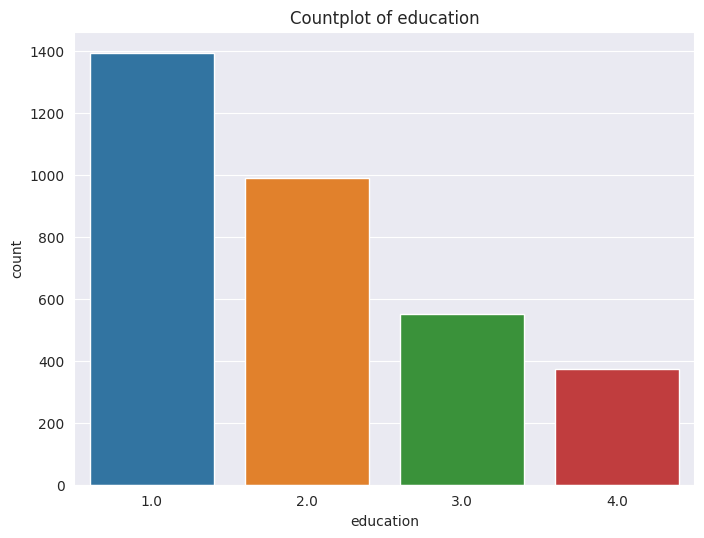

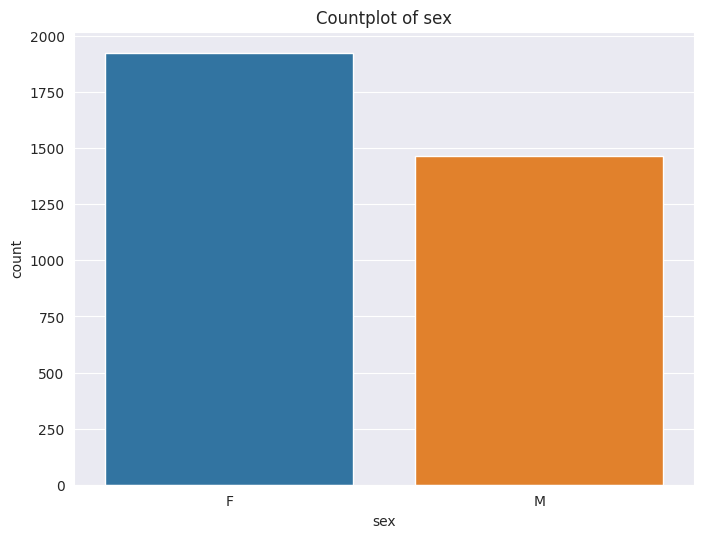

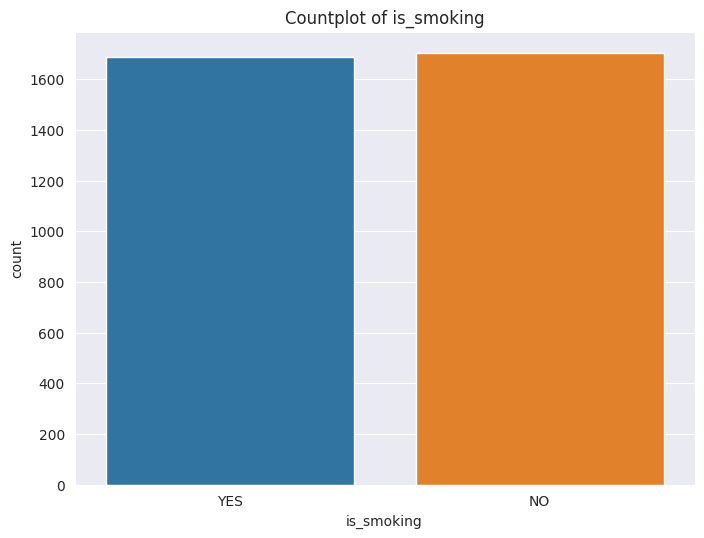

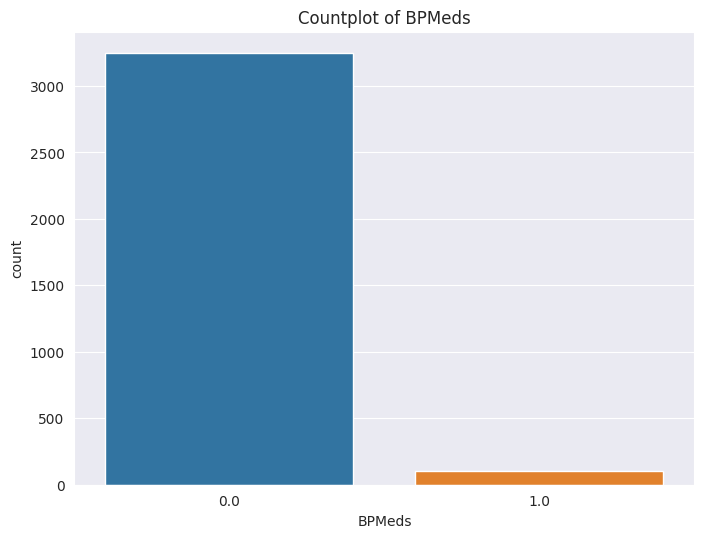

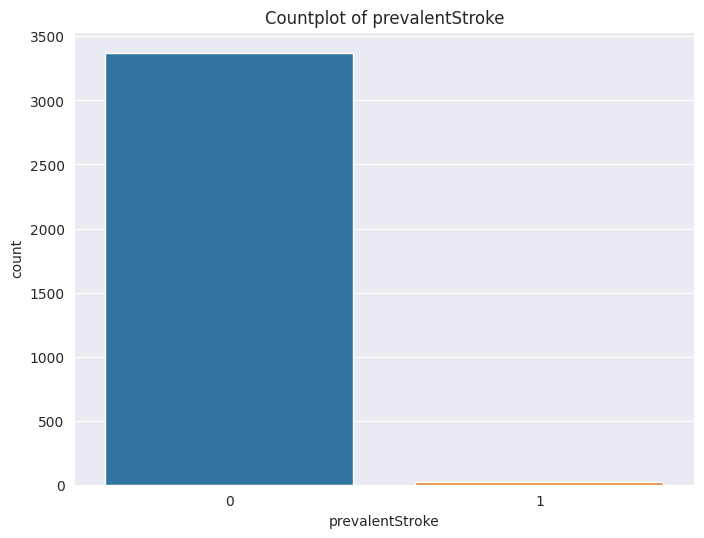

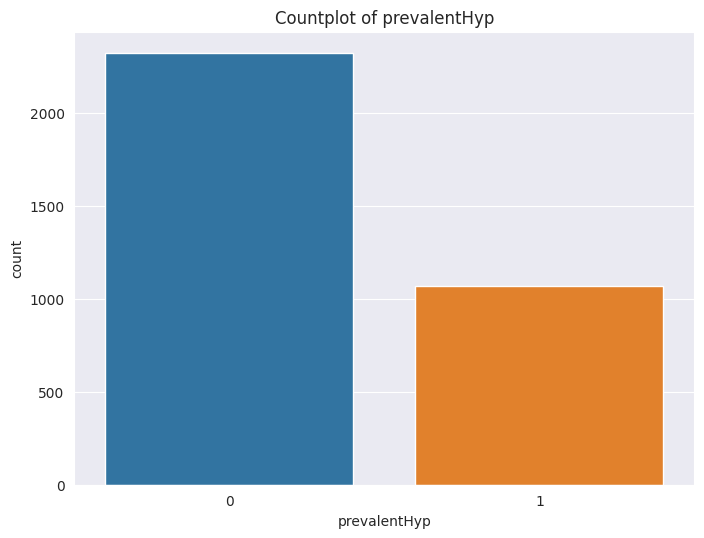

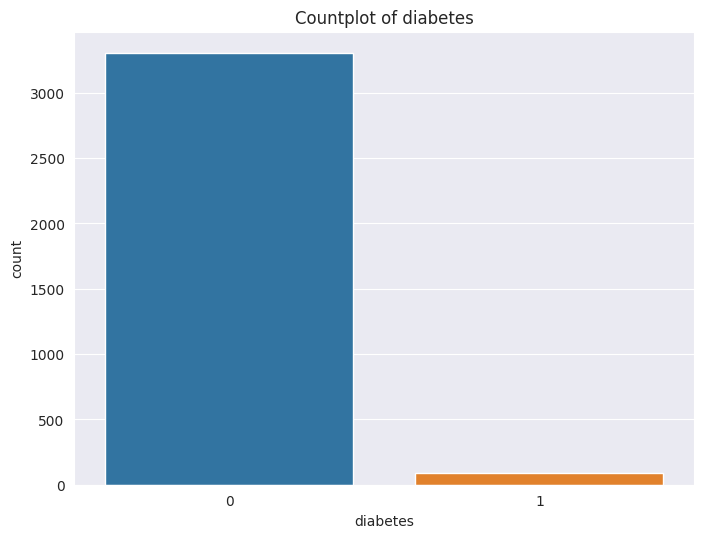

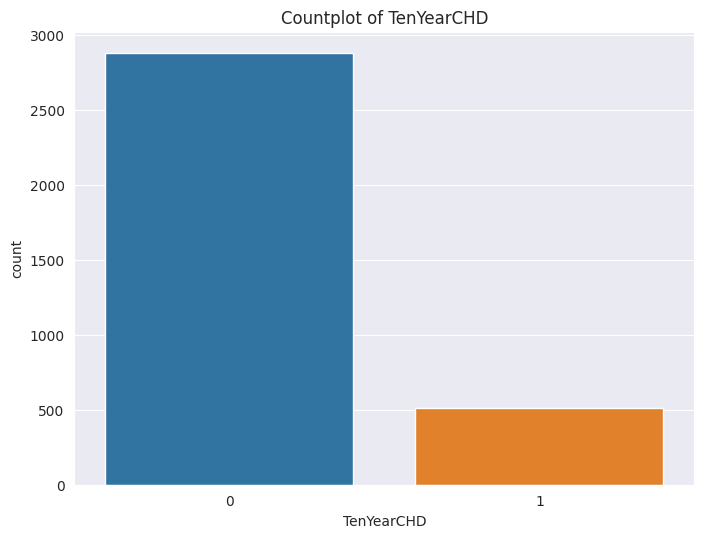

In [ ]:
# Chart - 1 visualization code
for col in df.columns:
  if col in ['is_smoking', 'education', 'sex', 'BPMeds','prevalentStroke','prevalentHyp', 'diabetes','TenYearCHD']:
    plt.subplots(1,1)
    ax=sns.countplot(x=df[col])
    ax.set_title(f'Countplot of {col}')

##### 1. Why did you pick the specific chart?

The countplot represents the count of each category present in the dataset. So, we choose this chart to check the occurance of each category in any categorical feature.

##### 2. What is/are the insight(s) found from the chart?

The following points we noticed about each categorical column.
* There are four category of education (i.e. 1, 2, 3, and 4). And majority of the people have level 1 education followed by level 2, and least in level 4.
* The number of females is more than males.
* The number of people smoking is equal to the number of people who don't smoke.

* A few number of people take BP meds.
* A negligible number of people have prevalanet stroke.
* Approximately 1000 people have prevalent hypertension.
* A large portion of people haven't got diabetes but few have diabetes.
* Approximately 500 people have TenYearCHD, and around 2900 people haven't.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The above countplot gives us a lot of information about the pervalent hypertension, prevalanet stroke, diabetes, etc.
This will definitely help the healthcare induries to draw useful insights from the above plot. 

#### Chart - 2 Hist Plot for Each Continuous Variables (Univariate)

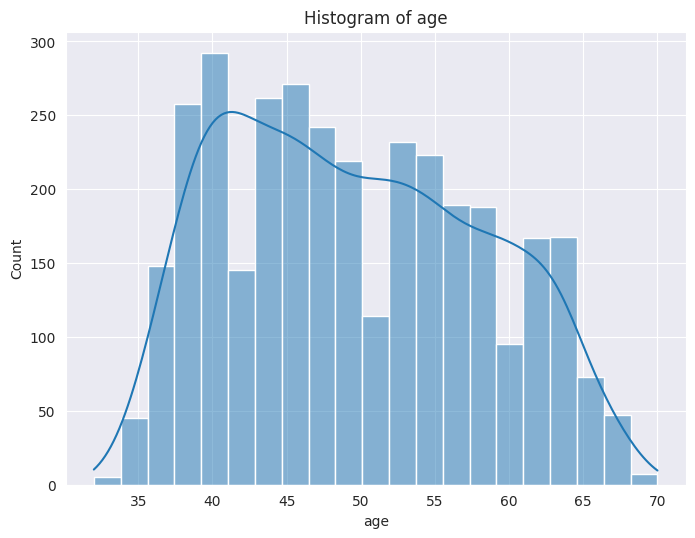

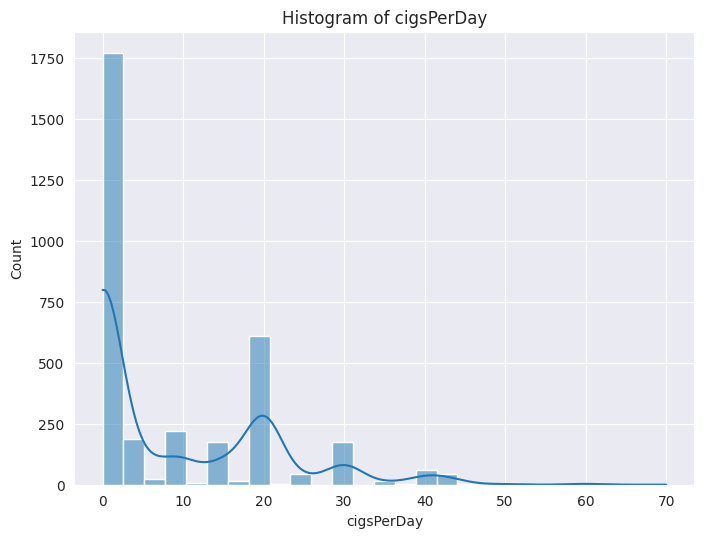

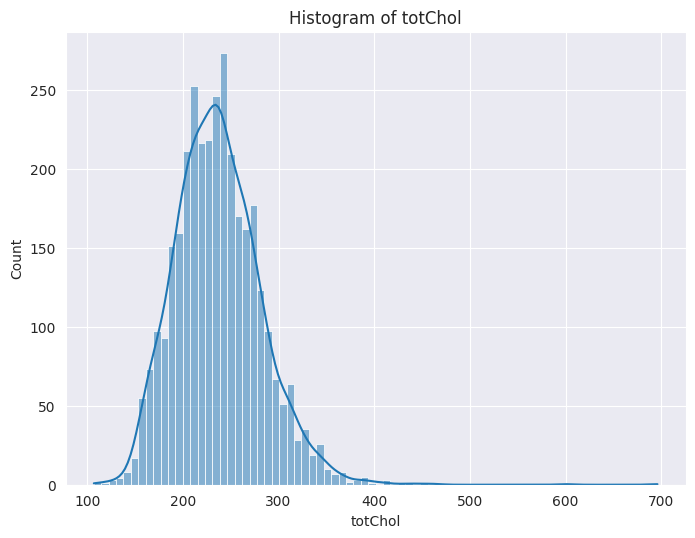

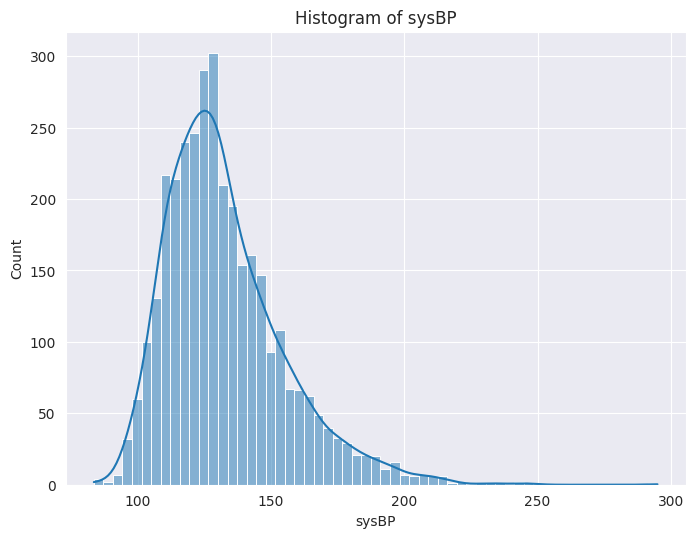

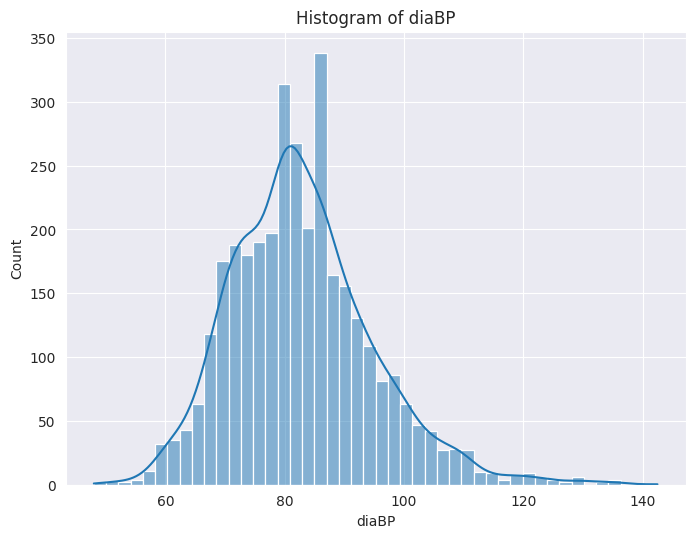

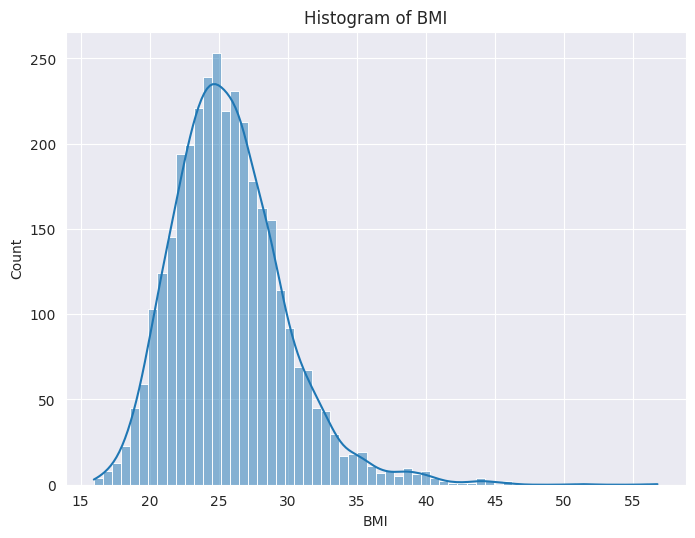

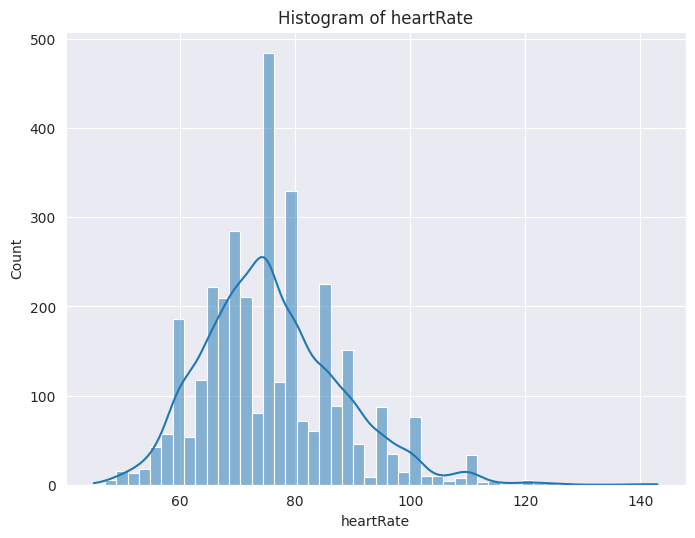

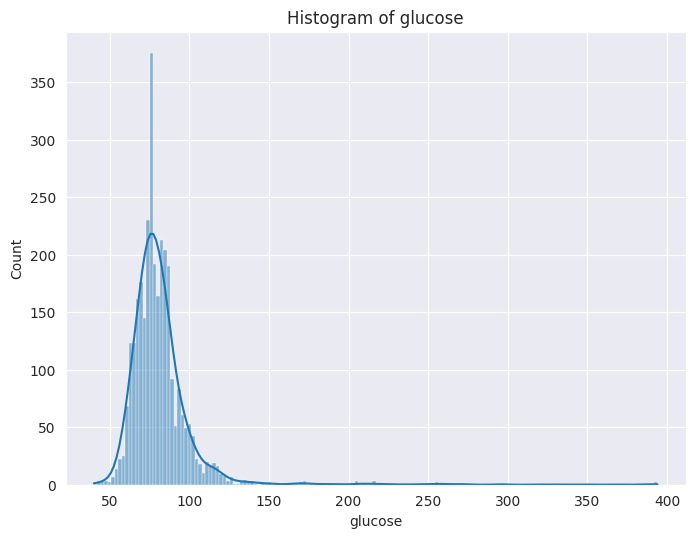

In [ ]:
# Chart - 2 visualization code

# Check the distribution of each numerical columns using histogram
for col in df.describe().columns.to_list():
  if col not in ['id', 'is_smoking', 'education', 'sex', 'BPMeds','prevalentStroke','prevalentHyp', 'diabetes','TenYearCHD']:
    plt.subplots(1,1)
    ax=sns.histplot(x=df[col], kde=True)
    ax.set_title(f'Histogram of {col}')


##### 1. Why did you pick the specific chart?

The histogram are used to find the outliers in the data, check the distribution, skewness, etc. of any continuous variable present in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The following insights we gained from the above plot.
* The maximum people lies between the age 37 and 55 years in the available dataset.
* Most people (approx 1750) don't smoke, and 20 cigs per day is consumed by approximately 625 people.
* Total cholestrol follows a normal distribution except there are some outliers in the data.
* Systolic BP follows an approximetly normal distribution. It has some outliers, and it shows a positive skewness (very little). 
* The diastolic BP denotes a bell curve except when diaBP is around 80.
* BMI column shows a normal distribution but it has a few outliers.
* Most people's heart rate lies between 60 and 90.
* Glucose has lot of outliers in the right so, it is a positively skewed.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This insights helps in modeling. These insights will help us in data transformation, scaling the data, etc.
From this chart, we get a lot of insights about the numerical columns, and it will lead to a good business impact (to detect the CHD at earliest).

#### Chart - 3 Barplot between Heart Rate and TenYearCHD (Bivariate)

Text(0.5, 1.0, 'bar chart between the heartRate and TenYeaeCHD')

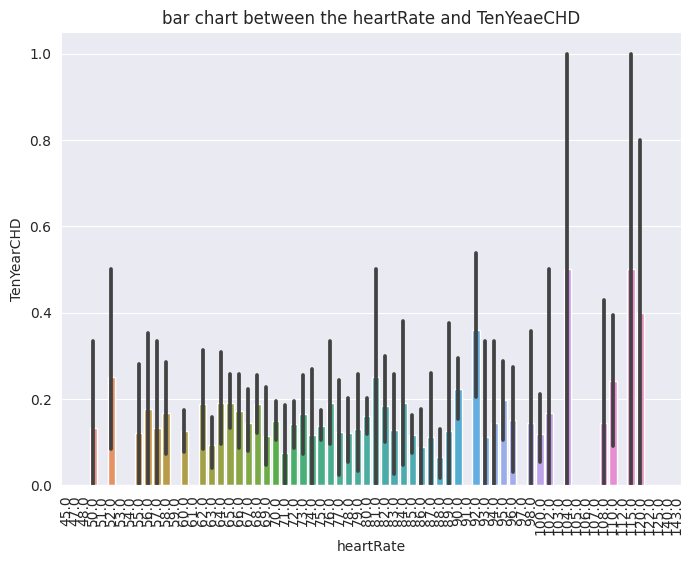

In [ ]:
# Chart - 3 visualization code
# Writing code for ploting bar chart between the heartRate and TenYeaeCHD
ax=plt.gca()
plt.rcParams.update({'figure.figsize':(14,10),'figure.dpi':100})
sns.barplot(x=df['heartRate'],y=df['TenYearCHD'])
plt.xticks(rotation=90)
ax.set_title('bar chart between the heartRate and TenYeaeCHD')


##### 1. Why did you pick the specific chart?

A bar plot is used to display and compare the distribution of categorical data. The length of bar shows the magnitude of each categorical feature in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The bar plot shows the relative frequency (for TenYearCHD) is greater if the heart rate is 104, 115, and 120.
So, it indicates that the probability of geting CHD is high if the heart rate is 104, 115, or 120. In general, there is no gradual increase in TenYearCHD with increasing heart rate.  Means no clear correlation between the heart rate and TenYearCHD.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This bar chart helps us to conclude a relationship between the TenYearCHD and heart rate. And it helps the healthcare industries while predicting whether a person will get a CHD or not.

#### Chart - 4 Pie Chart of Showing Proportions of Euducation Level (Univaraite)

Text(0.5, 1.0, 'Percentage of Education Levels')

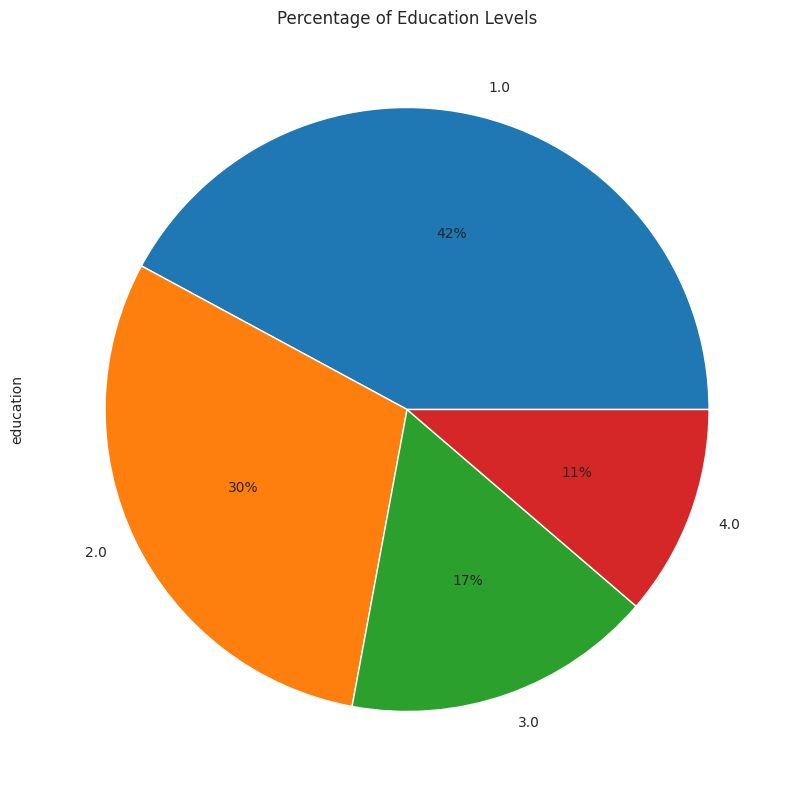

In [ ]:
# Chart - 4 visualization code

# Define the value counts in Education
education=df['education'].value_counts()

# Define the plot in percentage
education.plot(kind='pie', autopct='%1.0f%%')
plt.title('Percentage of Education Levels')

##### 1. Why did you pick the specific chart?

A pie chart depicts the percentage of a quanity in a particular category. This chart shows the proportions of education level present in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The following insights are extracted from the above pie chart.
* 42% people have education level 1.
* 30% people have education level 2.
* 17% people have education level 3.
* 11% people have education level 4.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This information only tells us about the proportion of people present in our dataset. This varaible is generaly doesn't causes much effect on our target variable (TenYearCHD).

#### Chart - 5 Bar Plot between Age and TenYearCHD (Bivariate)

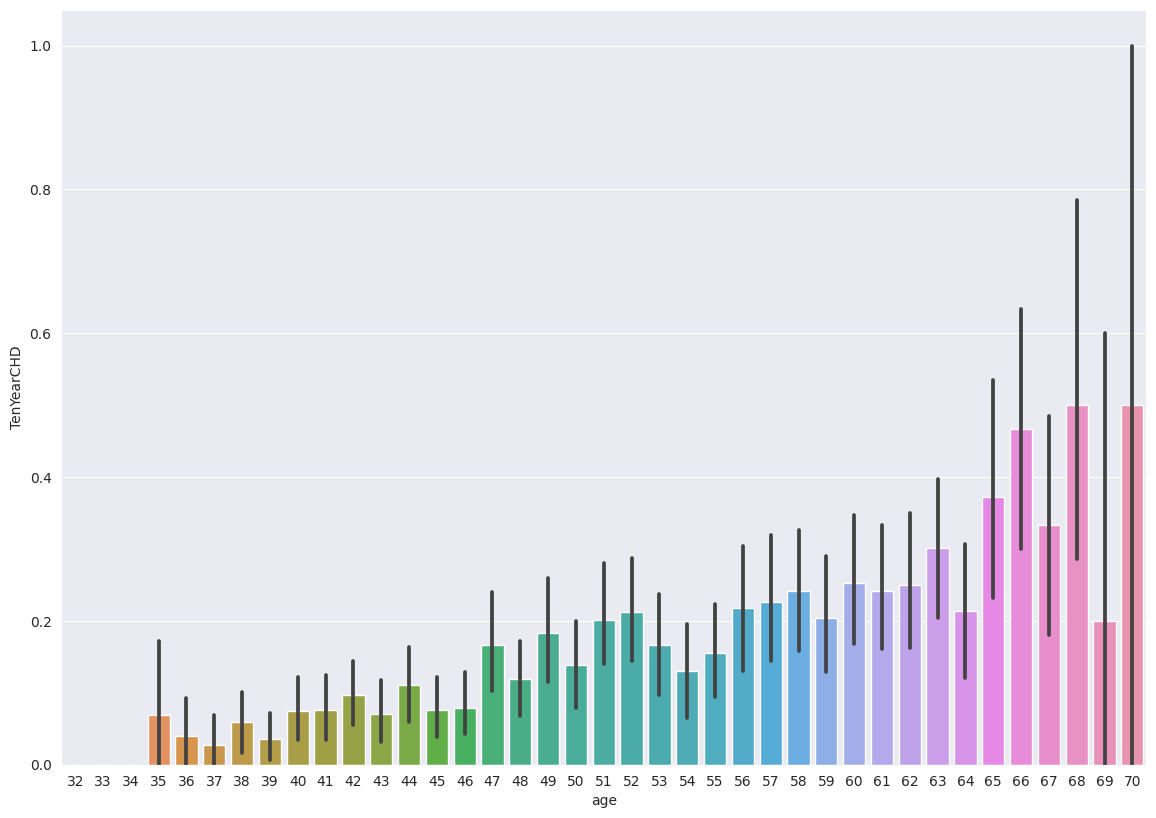

In [ ]:
# Chart - 5 visualization code

# Writing a code to find a relationship between the age and TenYearCHD
sns.barplot(x=df['age'],y=df['TenYearCHD'])

##### 1. Why did you pick the specific chart?

A bar plot is used to find the relative frequency of a categorical variable. The bar plot shows the probability (relative frequency) of getting CHD with increasing the age.

##### 2. What is/are the insight(s) found from the chart?

From the above chart, it is clear that the relative frequency is increasing with increasing the age.
So, the chances of getting CHD is high if the age is high. So, the TenYearCHD is proportional to age.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The above gained insights will definitely help the positive business impact for a healthcare industry. So, while using a ML model, this feature (age) will play a crucial role while predicting whether a person will get CHD or not.

#### Chart - 6 Bar Plot between each categorical variable and the target variable (Bivariate)

In [ ]:
cols=list(set(df.columns)-set(['id', 'age', 'totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose','cigsPerDay', 'TenYearCHD']))
cols

['BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'education',
 'sex',
 'is_smoking']

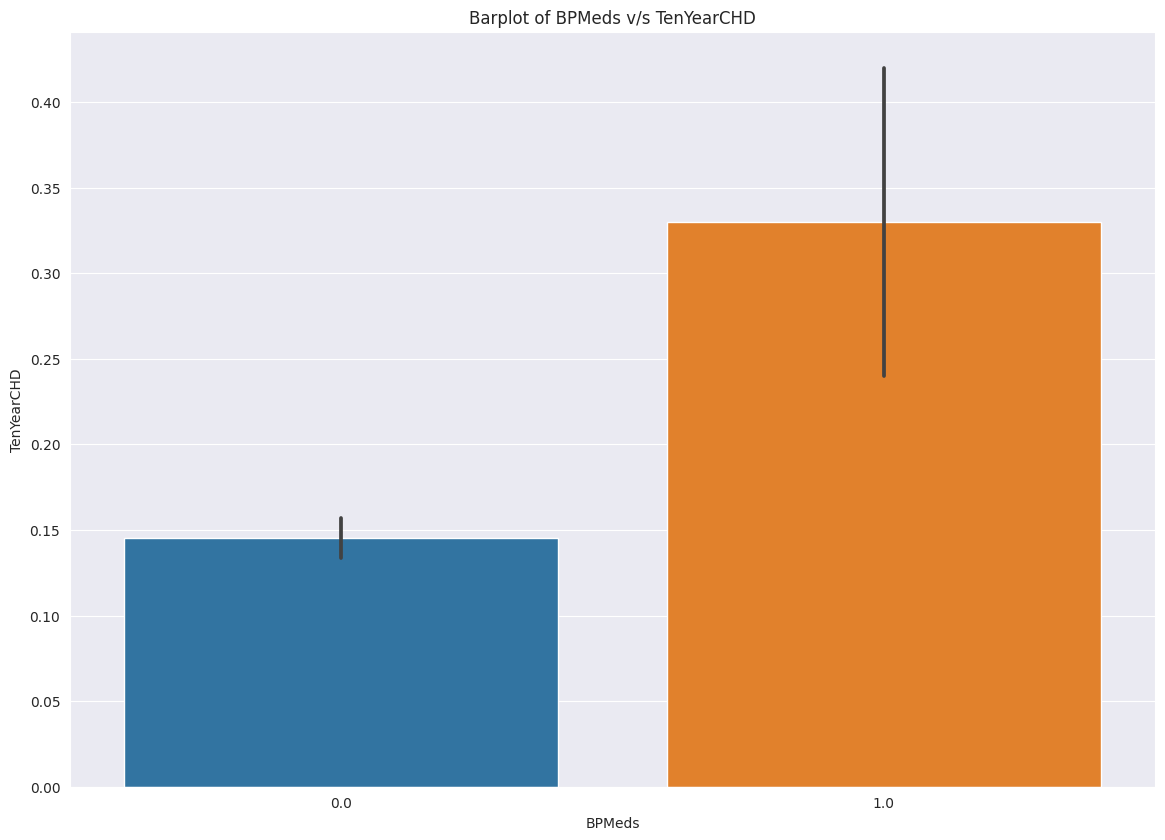

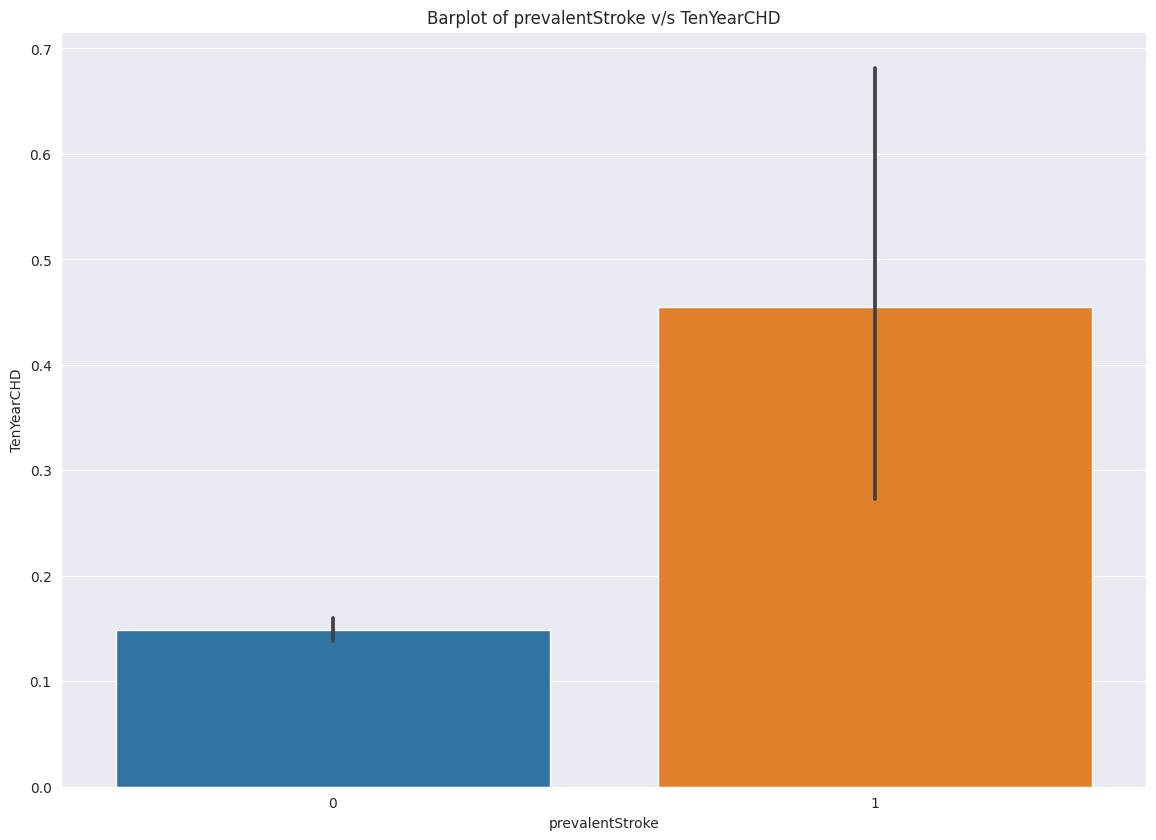

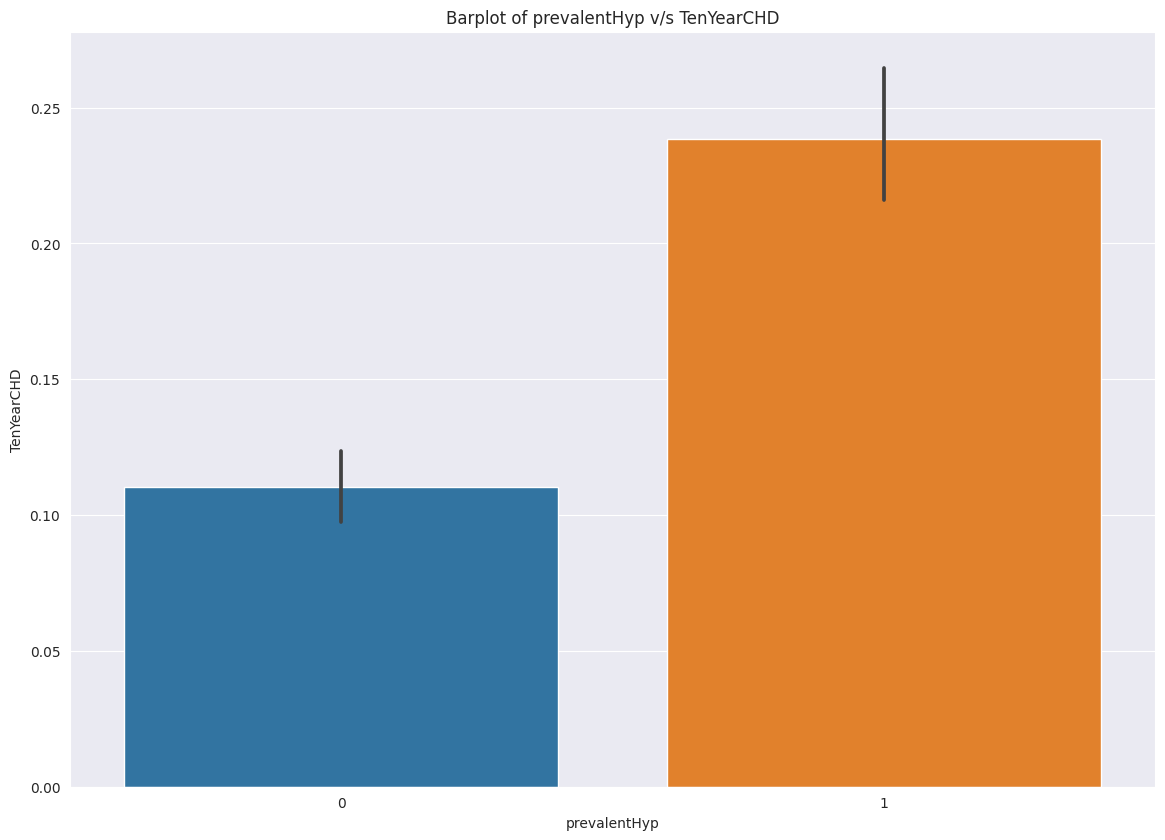

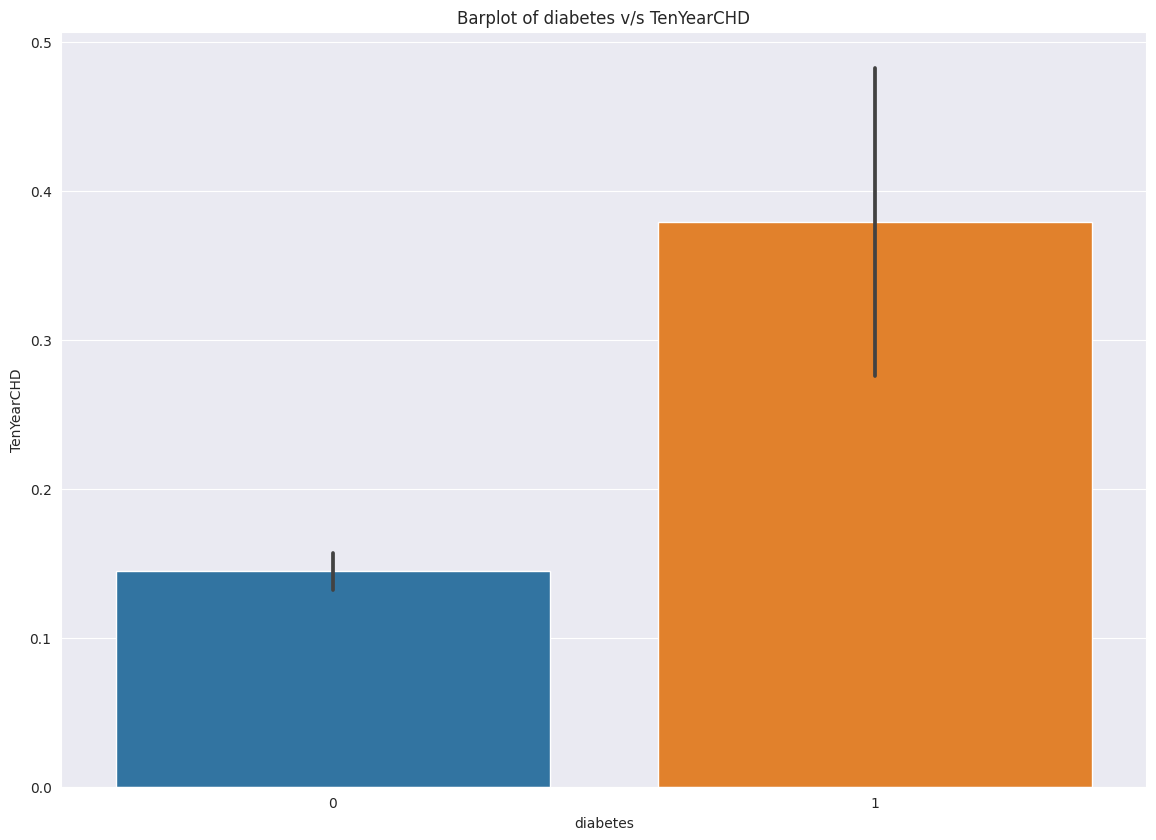

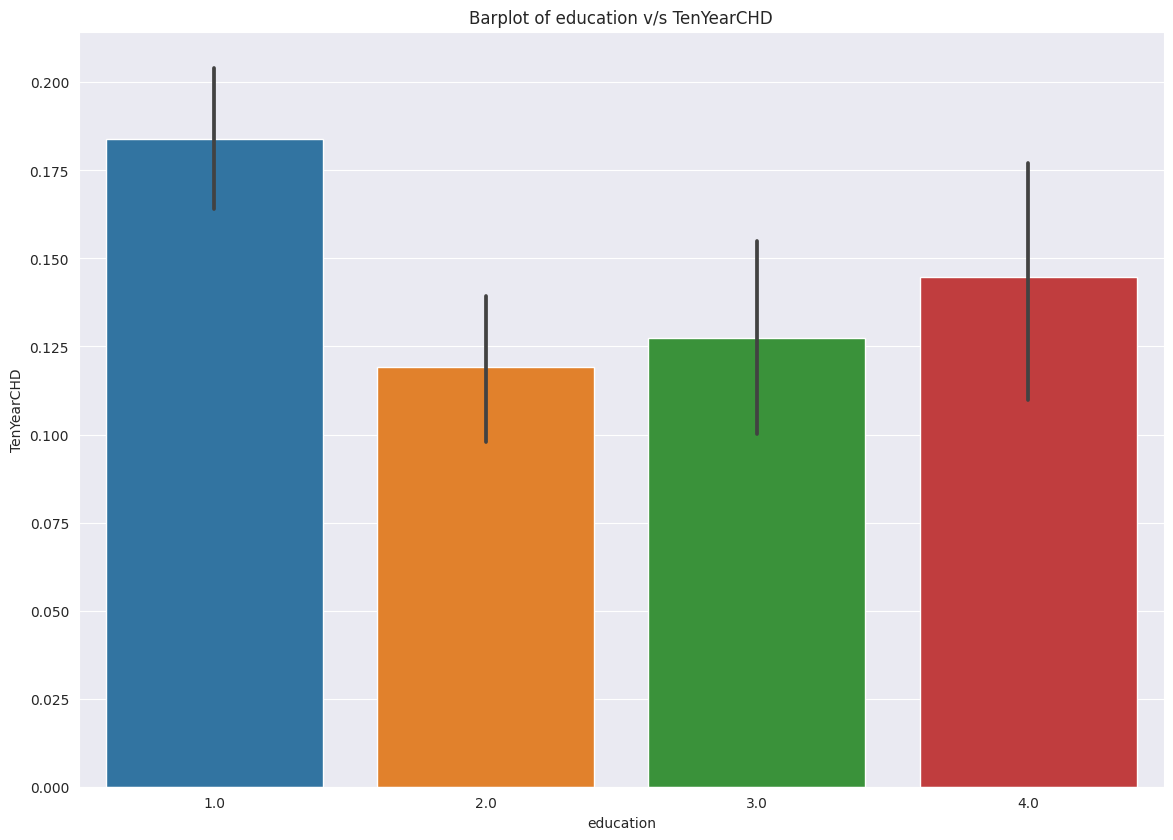

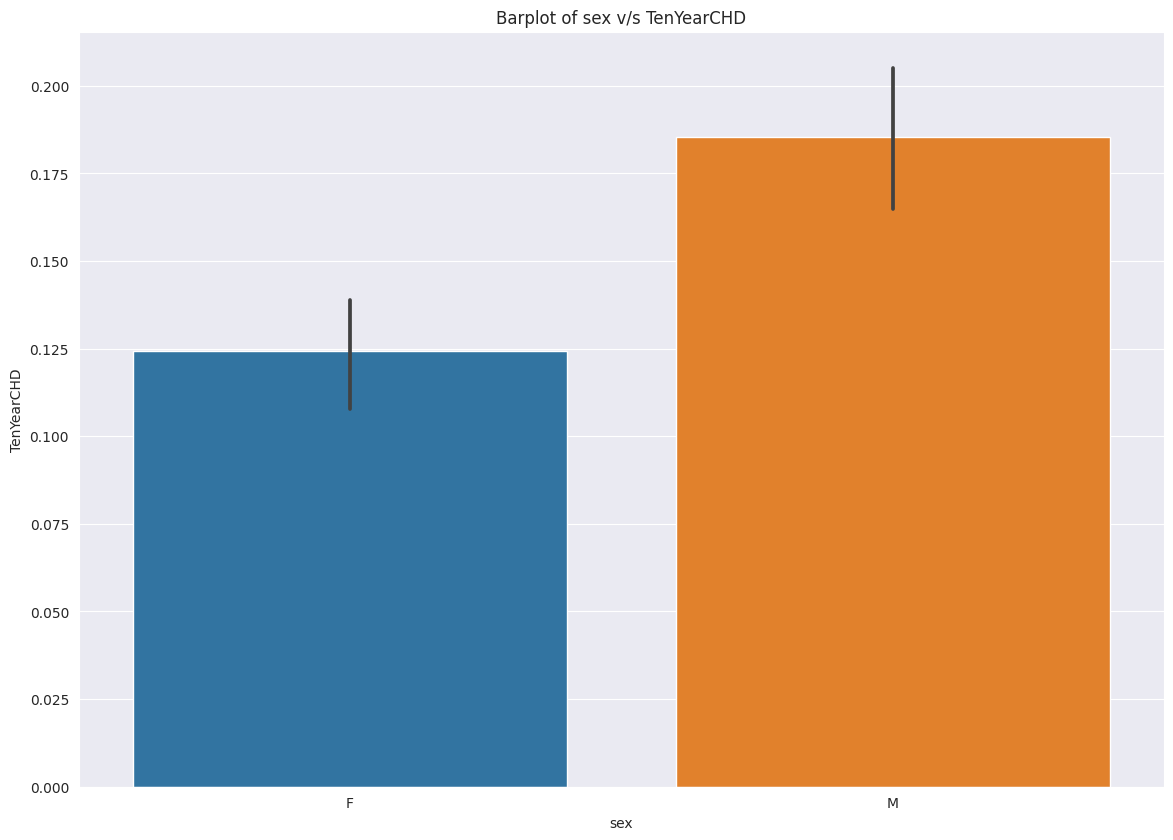

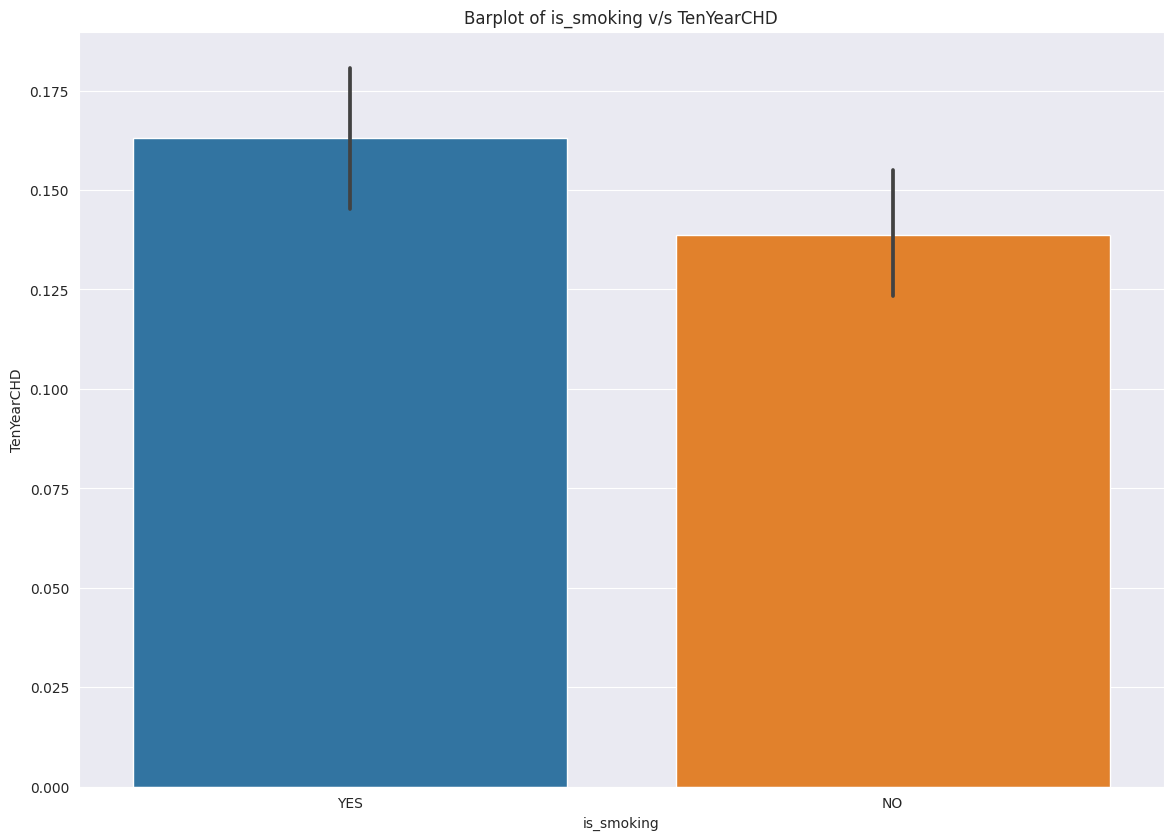

In [ ]:
# Chart - 6 visualization code

# Bar plot between categorical column (containing two or four values) and the target variable

for col in cols:                                                                           
    plt.subplots(1,1)       # Here, subplot depect one row and one column 
    ax=sns.barplot(df[col],y=df['TenYearCHD'])                                                                      
    ax.set_title(f'Barplot of {col} v/s TenYearCHD')     # Set title for each graph

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7 Violin Plot between TenYearCHD and BMI (Bivariate)

Text(0, 0.5, 'Body Mass Index')

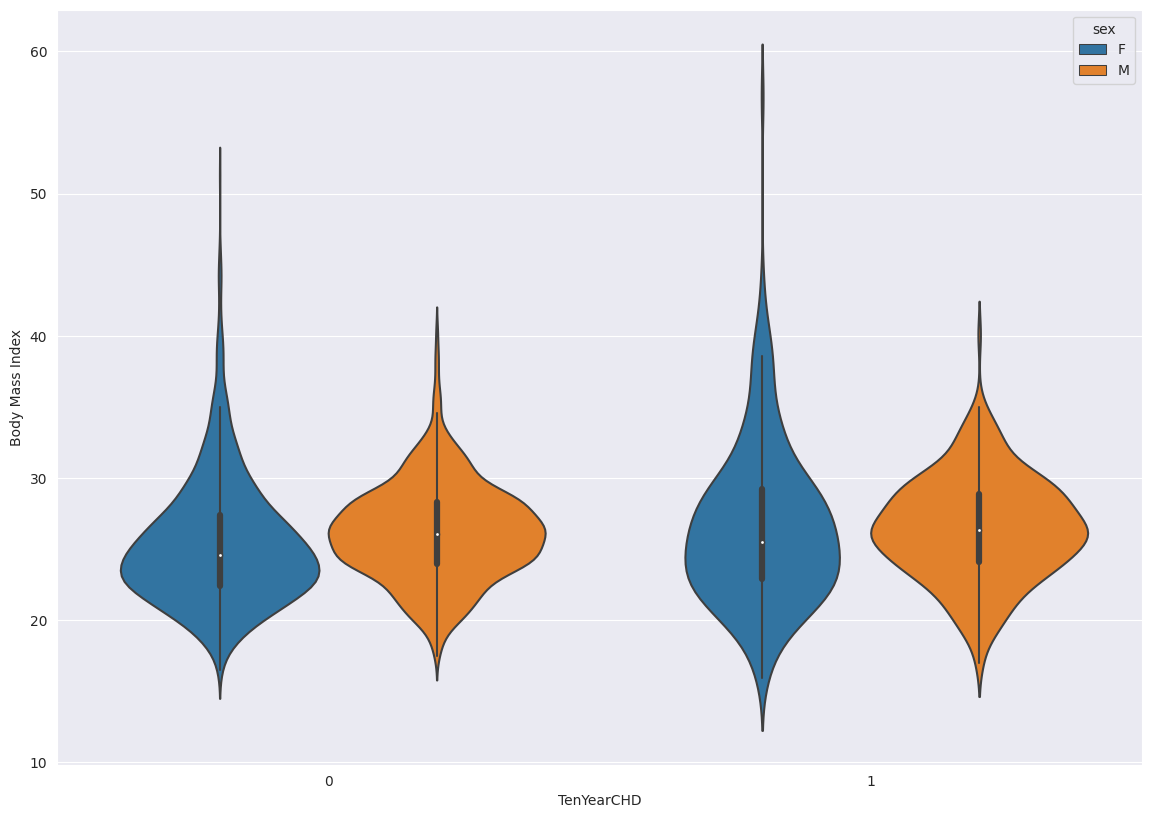

In [ ]:
# Chart - 7 visualization code
ax = plt.gca()
sns.violinplot(x='TenYearCHD', y='BMI', hue='sex', data=df)
ax.set_xlabel("TenYearCHD")
ax.set_ylabel("Body Mass Index")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8 Scatter Plot between the age and BMI considering sex column (Multivariate)

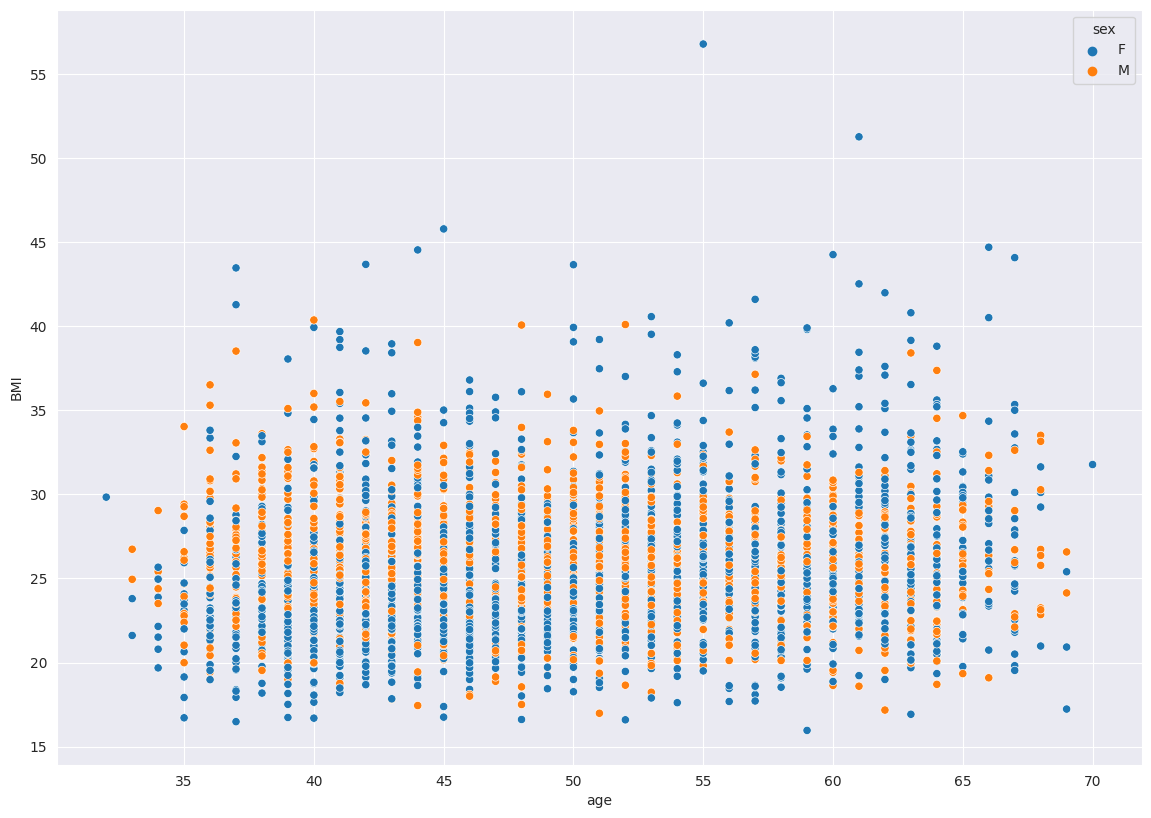

In [ ]:
# Chart - 8 visualization code
# Writing a code to draw a scatterplot that depicts the relation between the age and BMI
sns.scatterplot(x=df['age'], y=df['BMI'], hue=df['sex'])
plt.show()

##### 1. Why did you pick the specific chart?

We use the chart to find the relationship between the age and BMI columns.

##### 2. What is/are the insight(s) found from the chart?

There is no correlation between the age and BMI. We are not seeing any positive or negative trend seen in the BMI with increasing the age.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As we see earlier, that the risk of getting heart disease is high with increasing the age. We are seeing that there is no correlation between the age and BMI so, this information will neither lead to positive or negative impact on the predicting TenYearCHD.

#### Chart - 9 Bar Plot between the Cigarates per day and TenYearCHD considering Sex (Multivariate)

Text(0.5, 1.0, 'Bar Plot between the Cigarates per day and TenYearCHD considering Sex')

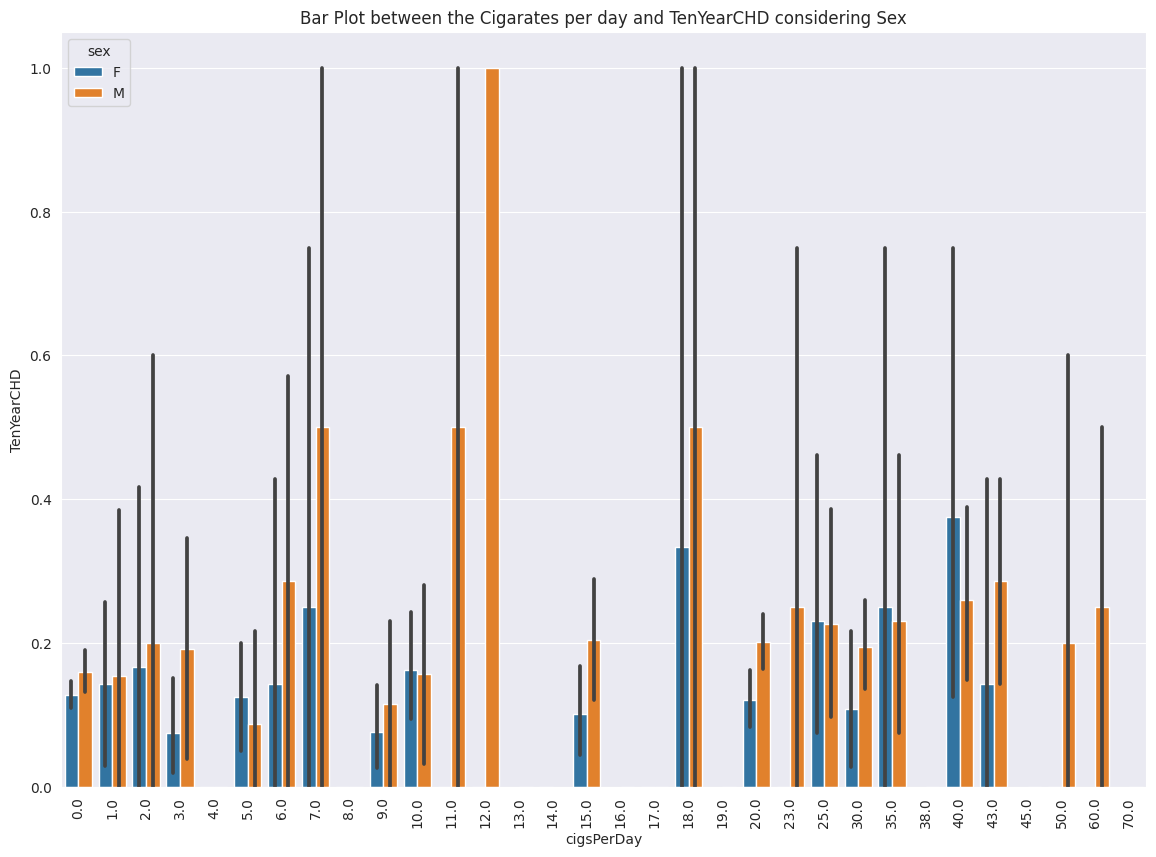

In [ ]:
# Chart - 9 visualization code
ax=plt.gca()
sns.barplot(x=df['cigsPerDay'],y=df['TenYearCHD'],hue=df['sex'])
plt.xticks(rotation=90)
ax.set_title('Bar Plot between the Cigarates per day and TenYearCHD considering Sex')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10 Boxplots of All Numerical Features 

In [ ]:
df.describe().columns # Find the numerical features

Index(['id', 'age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

Text(0.5, 0, 'Numerical Features')

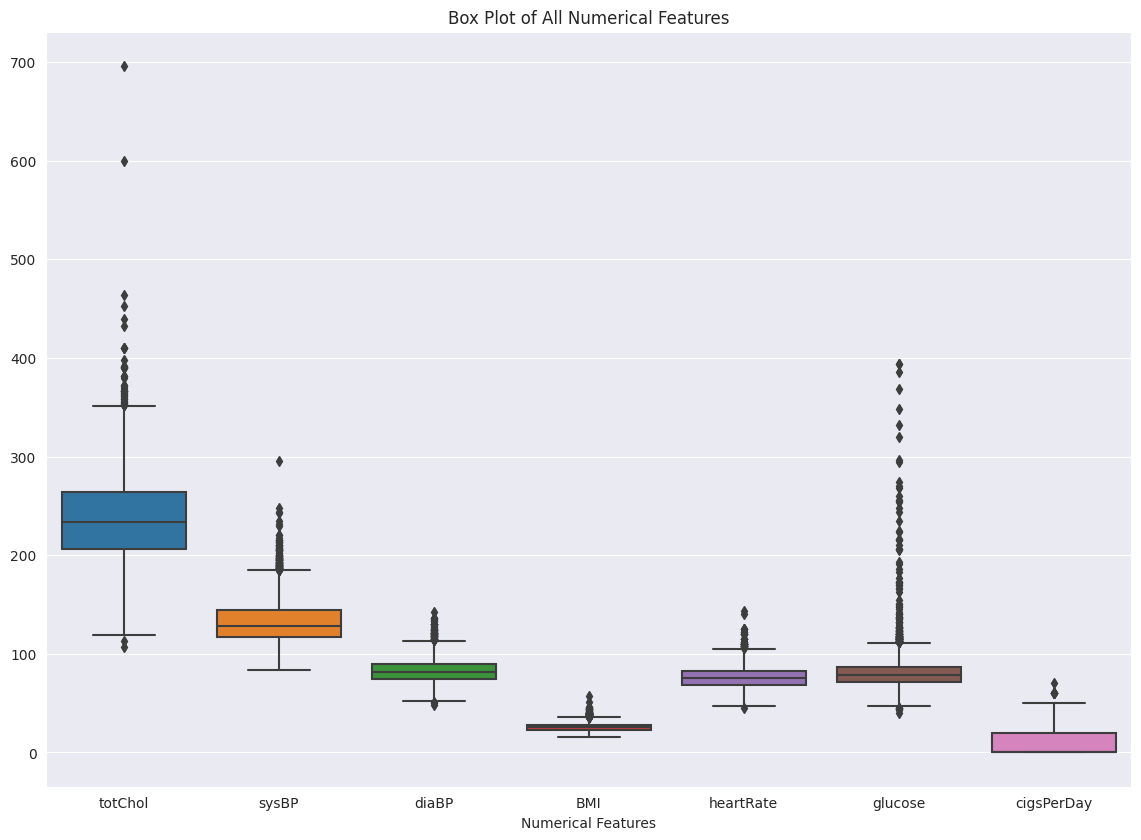

In [ ]:
# Chart - 10 visualization code

#Select the dataset containing numerical features in the dataset
cols_for_boxplot=df[['totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'cigsPerDay']]

# Create the box plot
sns.boxplot(data=cols_for_boxplot)

# Add a title to the plot
plt.title('Box Plot of All Numerical Features')
plt.xlabel('Numerical Features')


##### 1. Why did you pick the specific chart?

The box plot is used to check the outliers in the dataset. So, we picked the above chart to find the outliers in the numerical features. 

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11  Bubble Chart using Age, Heart Rate, and Total Cholestrol (Multivariate)

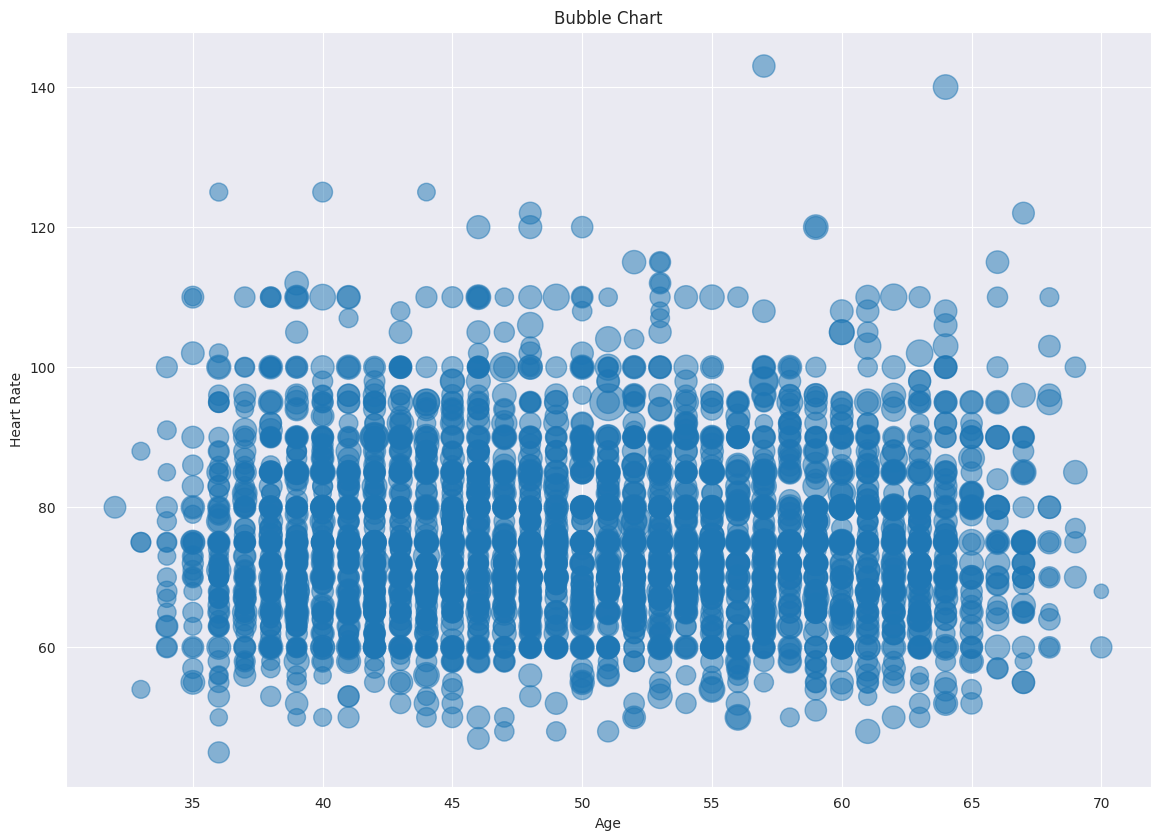

In [ ]:
# Chart - 11 visualization code
#Writting a code to plot a bubble chart considering three variables i.e 'age', 'heartRate', and 'totChol'
plt.scatter(x=df['age'], y=df['heartRate'],s=df['totChol'], alpha=0.5)

# Add labels and title
plt.xlabel("Age")
plt.ylabel("Heart Rate")
plt.title("Bubble Chart")

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12 Pie Charts of Each Categorical Column or Column with Fixed Number of Values

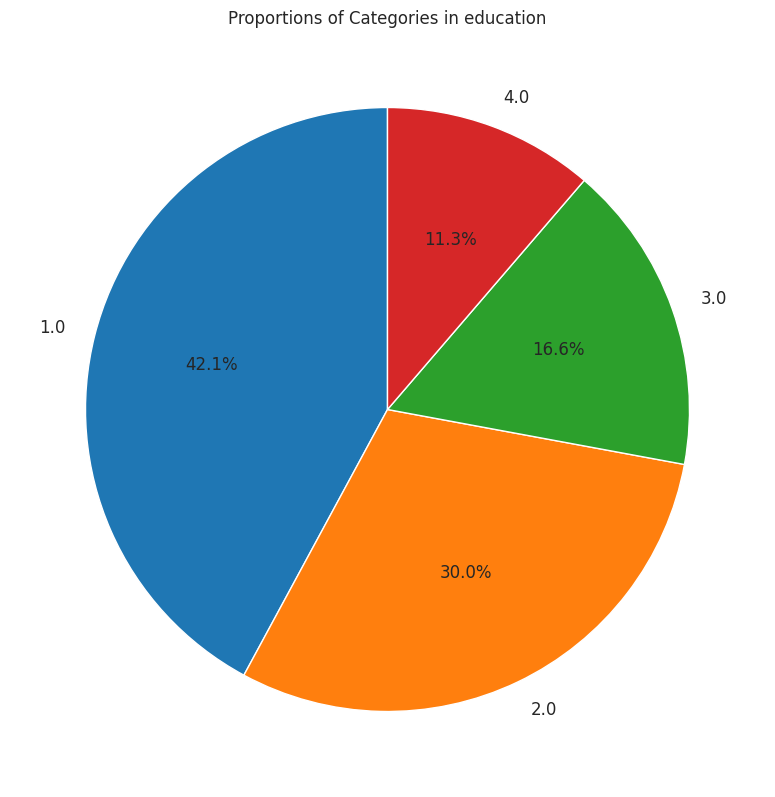

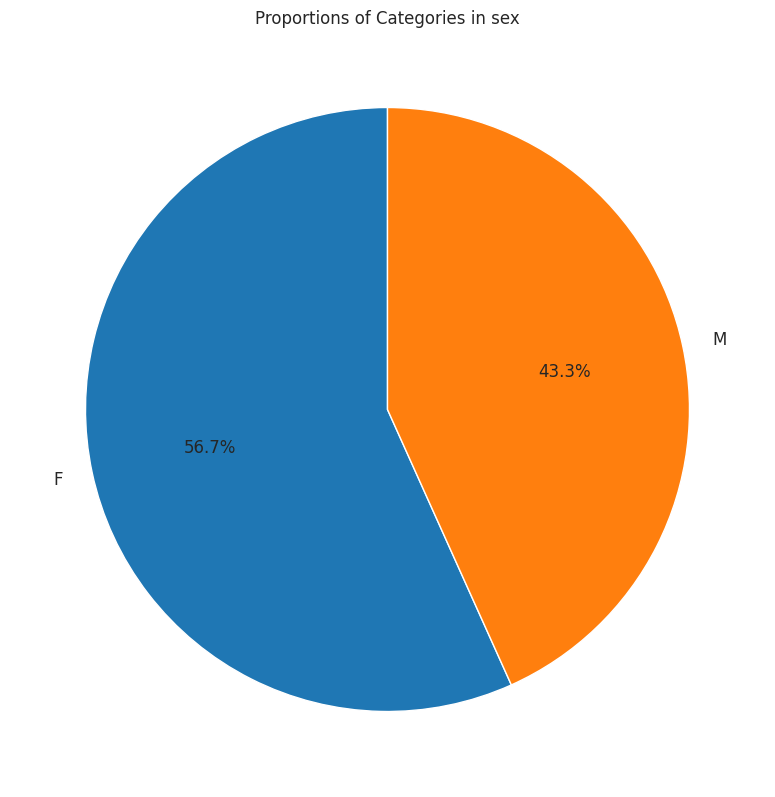

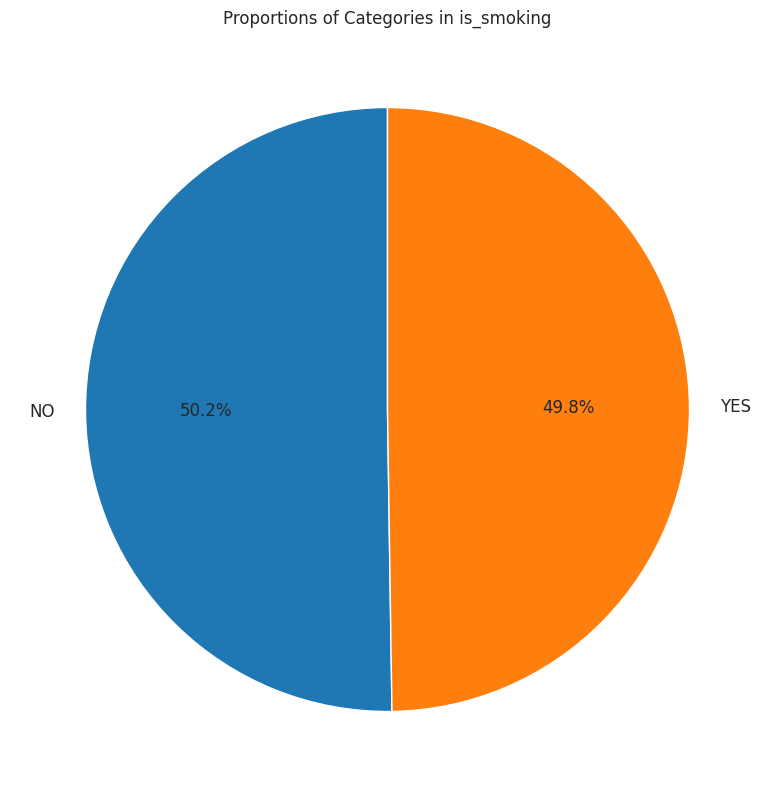

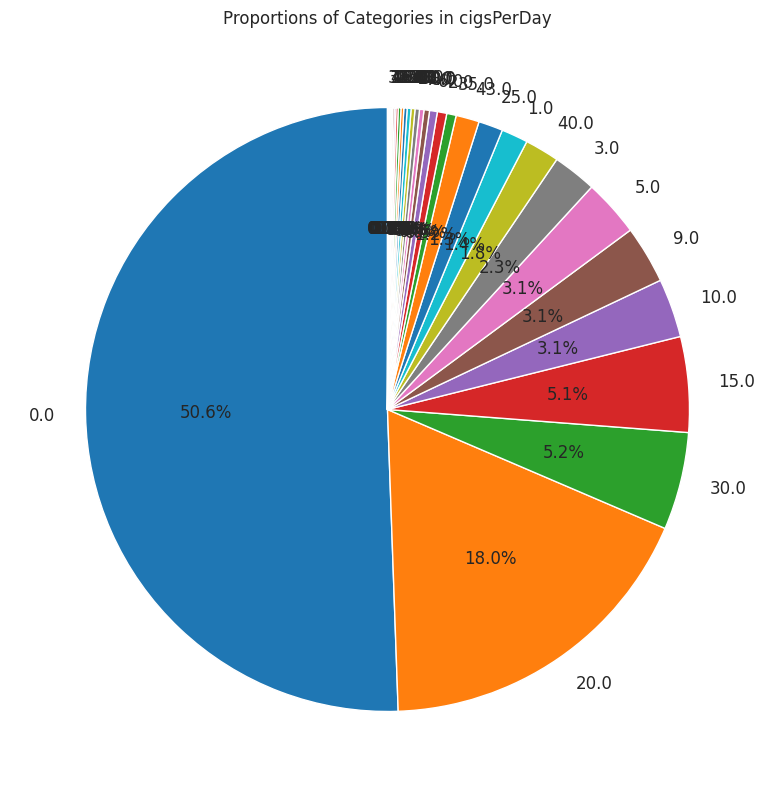

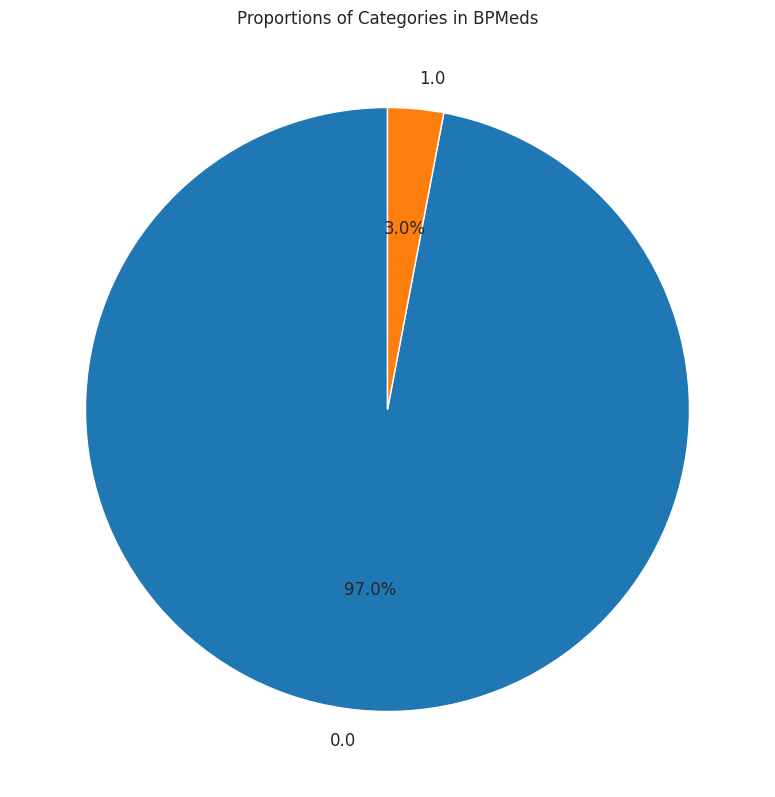

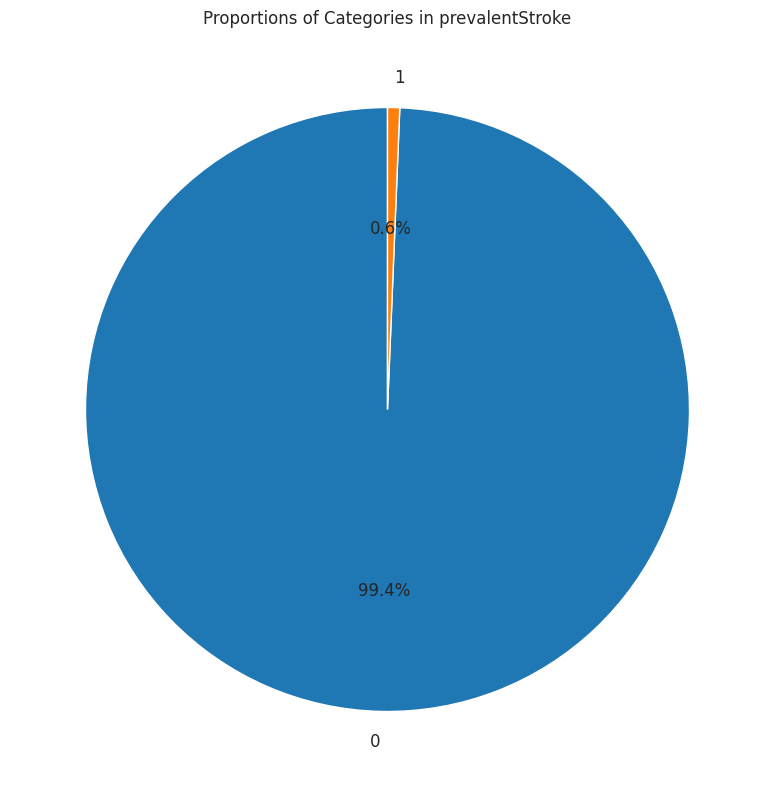

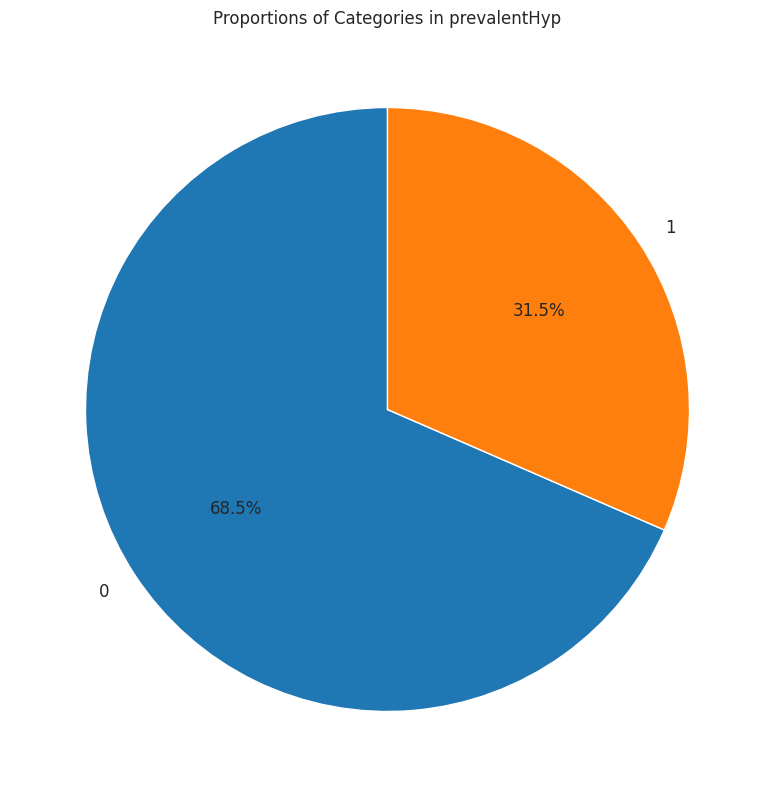

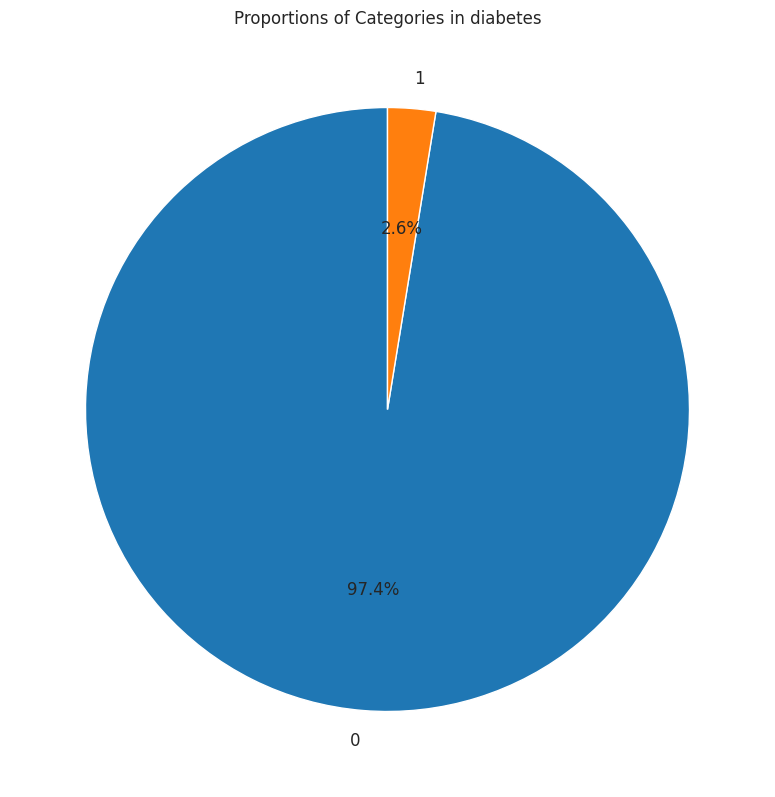

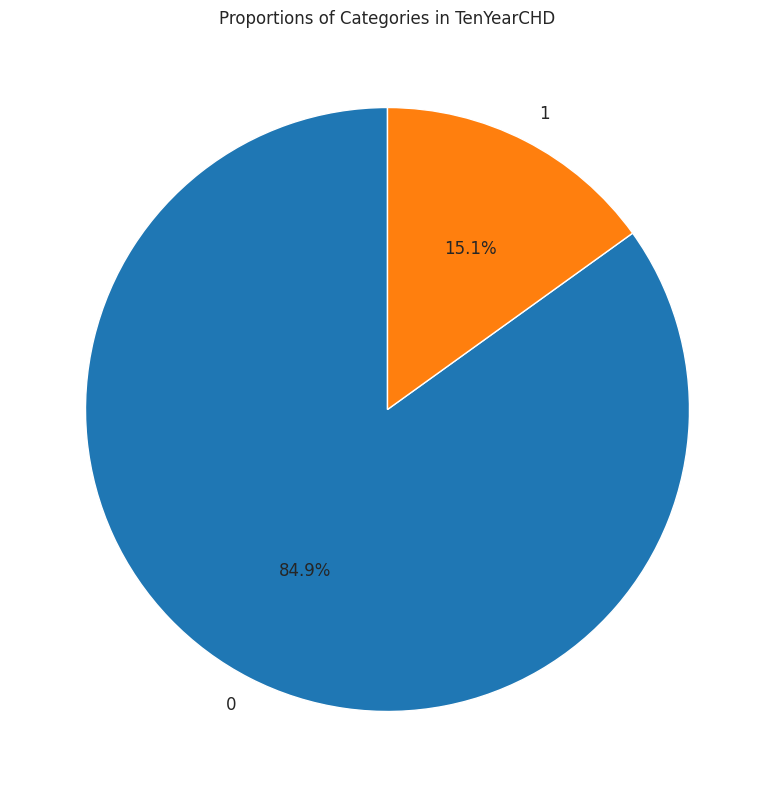

In [ ]:
# Chart - 12 visualization code


list_of_variables=['education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes','TenYearCHD']
for col in list_of_variables:
  counts = df[col].value_counts()
  # Plot the donut chart
  plt.pie(counts, labels=counts.index, startangle=90, autopct='%1.1f%%', textprops={'fontsize': 12})
  plt.title(f'Proportions of Categories in {col}')
  plt.show()
  


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13 Line Plot between age and TenYearCHD (Bivariate)

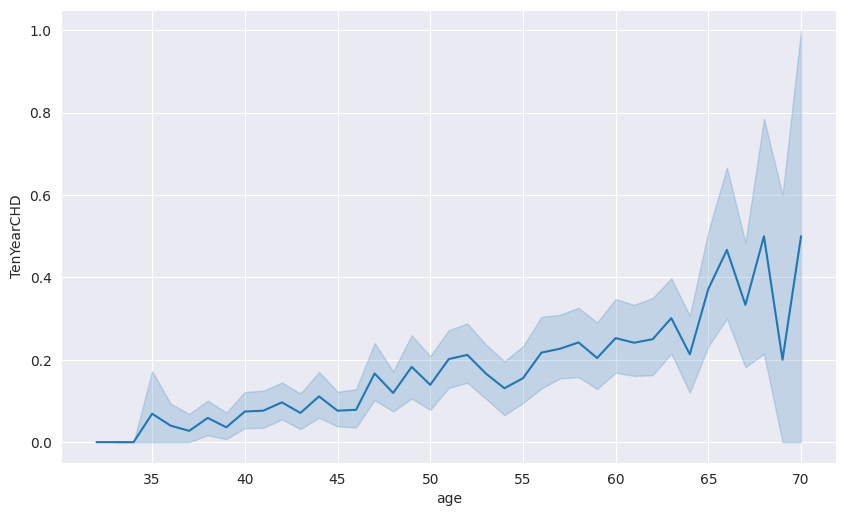

In [ ]:
# Chart - 13 visualization code

#Writing a code for plotting line plot between the target variable and age, cigsPerDay, and heartRate
plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y="TenYearCHD", data=df)


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

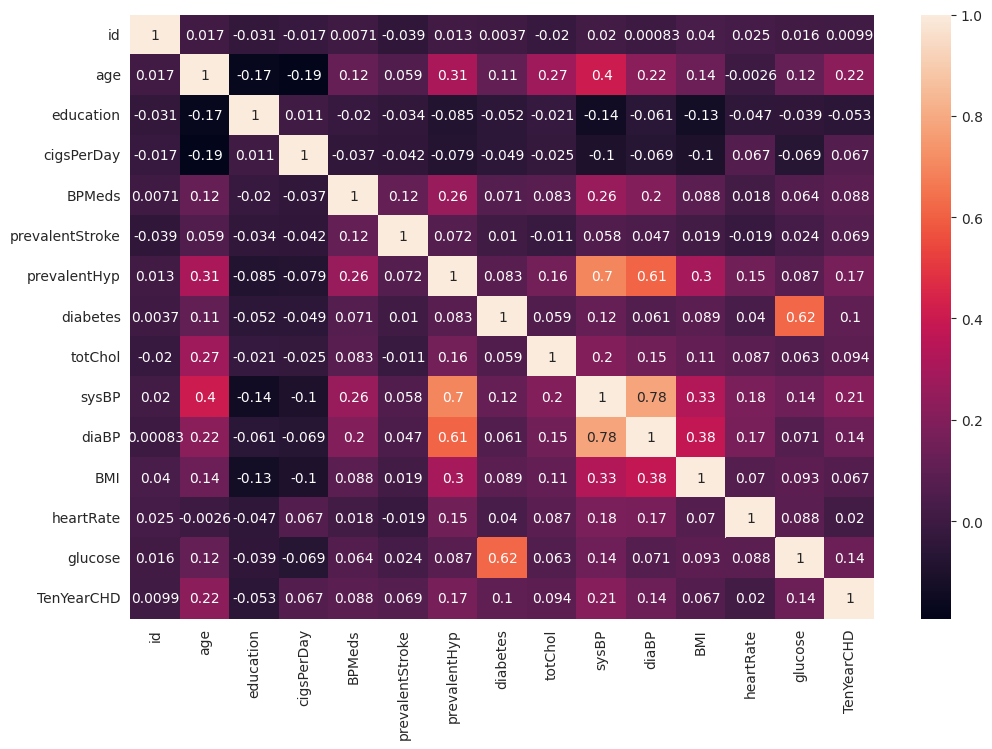

In [ ]:
# Correlation Heatmap visualization code
plt.rcParams.update({'figure.figsize':(12,8),'figure.dpi':100})

sns.heatmap(df.corr(),annot=True)


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
from seaborn.axisgrid import pairplot
# Pair Plot visualization code
# sns.pairplot(df)
# plt.show()

sns.pairplot(df, hue="TenYearCHD")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1.- Patient have common risk for devoloping CHD

2.- There is no relation between the features and devoloping CHD

3.-

### Hypothetical Statement - 1:T-test

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

A t-test is a statistical test used to determine whether there is a significant difference between the means of two groups.The t-test is typically used when the sample size is small, or when the population standard deviation is unknown. There are several types of t-tests, including the Student's t-test and the Welch's t-test, which are used for different types of data and research questions.

Ho: On average, Patients have the common risk of devoloping heart disease

Ha:  On average, Patients have not the common risk of devoloping heart disease




#### 2. Perform an appropriate statistical test.

In [ ]:
import scipy #importing library

In [ ]:
# Perform Statistical Test to obtain P-Value
def ttest(col1, col2, varname ):
    t, p = scipy.stats.ttest_ind(col1,col2)
    #print('t=%.2f, p=%.30f' % (t, p))
    print("ttest_ind:               t = %g  p = %g" % (t, p))

    if p > 0.05:
       print('fail to reject null hypothesis', varname, 'has no effect on  devoloping CHD')
    else:
       print('reject null hypothesis' , varname, 'has impact on risk of devoloping CHD')



In [ ]:
#Defining data variables 
CHD = df[df.TenYearCHD == 0]
NoCHD = df[df.TenYearCHD == 1]

In [ ]:
ttest(CHD.age,NoCHD.age,"Age")

ttest_ind:               t = -13.4365  p = 3.86915e-40
reject null hypothesis Age has impact on risk of devoloping CHD


In [ ]:
#effect of cigssperday
ttest(CHD.cigsPerDay,NoCHD.cigsPerDay,"cigsPerDay")

ttest_ind:               t = nan  p = nan
reject null hypothesis cigsPerDay has impact on risk of devoloping CHD


In [ ]:
ttest(CHD.diabetes,NoCHD.diabetes,"Diabetes")

ttest_ind:               t = -6.0676  p = 1.44156e-09
reject null hypothesis Diabetes has impact on risk of devoloping CHD


##### Which statistical test have you done to obtain P-Value?

A hypothesis t-test is a statistical test used to determine whether there is enough evidence to support a claim about a population mean. The test is based on a sample from the population, and uses the sample mean and standard deviation to estimate the population mean and standard deviation

##### Why did you choose the specific statistical test?

A t-test is used to determine whether there is enough evidence to support a claim about a population mean. The test is based on a sample from the population, and uses the sample mean and standard deviation to estimate the population mean and standard deviation.

### Hypothetical Statement - 2 : chi squared test

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The chi-squared test is a statistical test used to determine whether there is a significant difference between the expected frequencies and the observed frequencies in one or more categories. It is commonly used to determine if there is a significant association between two categorical variables.

Ho = There's no relation between features and devoloping CHD

Ha = both are related to each other 

#### 2. Perform an appropriate statistical test.

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
# Perform Statistical Test to obtain P-Value
def chi2_test(col1, col2, varname):
  contingency_data = pd.crosstab(col1, col2)
  stat, p, dof, expected = chi2_contingency(contingency_data)
  print("Chi-Square Value: " + stat.astype(str))
  print("P Value: " + p.astype(str))
  if p > 0.05:
     print('fail to reject null hypothesis', varname, 'has no effect on  devoloping CHD')
  else:
     print('reject null hypothesis' , varname, 'has impact on risk of devoloping CHD')


In [ ]:
chi2_test(df.education, df.TenYearCHD, "gender")

Chi-Square Value: 22.16105229004903
P Value: 6.038646749234552e-05
reject null hypothesis gender has impact on risk of devoloping CHD


In [ ]:
chi2_test(df.BPMeds, df.TenYearCHD, "BPMeds")

Chi-Square Value: 24.497970055393846
P Value: 7.438816815316195e-07
reject null hypothesis BPMeds has impact on risk of devoloping CHD


In [ ]:
chi2_test(df.is_smoking, df.TenYearCHD, "Smoking")

Chi-Square Value: 3.763250993795598
P Value: 0.05239062274853224
fail to reject null hypothesis Smoking has no effect on  devoloping CHD


##### Which statistical test have you done to obtain P-Value?

The chi-squared test-The test is based on the chi-squared distribution, and the p-value obtained from the test can be used to determine the significance of the difference between the observed and expected frequencies.

##### Why did you choose the specific statistical test?

The chi-squared test is used in hypothesis testing to determine if there is a significant difference between the expected frequencies and the observed frequencies in one or more categorical variables. It is used to test the goodness of fit of a theoretical distribution to a set of data, or to test for independence between two categorical variables in a contingency table.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
def show_missing():
    missing = df.columns[df.isnull().any()].tolist()
    return missing
print('Missing Data Percentage')
print(round(df[show_missing()].isnull().sum().sort_values(ascending = False)/len(df)*100,2))

Missing Data Percentage
glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


Treatment of **education** feature

In [ ]:
#Hence, the education is a categorical column so, we replace the missing value in education column with mode. So, check the mode

df.education.mode()[0]

1.0

In [ ]:
df.education.fillna(df.education.mode()[0],inplace=True)


In [ ]:
df.education.unique()

array([2., 4., 1., 3.])

Treatment of **CigsPerDay** feature

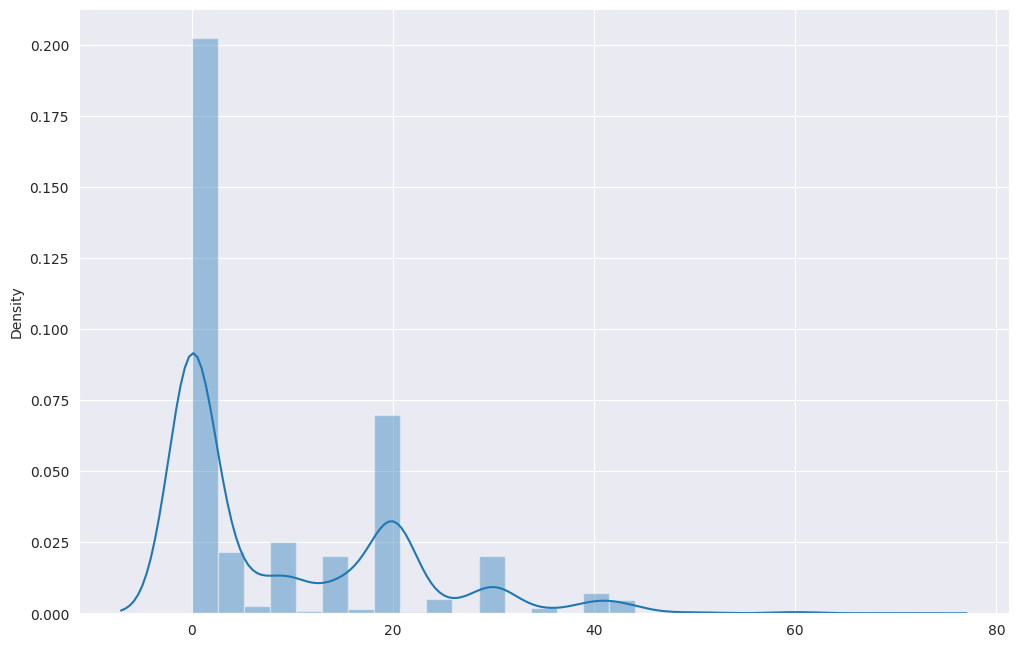

In [ ]:
sns.distplot(x=df.cigsPerDay)

In [ ]:
df.cigsPerDay.mode()[0]

0.0

In [ ]:
df.cigsPerDay.fillna(df.cigsPerDay.mode()[0],inplace=True)

In [ ]:
df['cigsPerDay'].describe()

count    3390.000000
mean        9.010619
std        11.862839
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64

Treatment of **BPMeds** column

In [ ]:
df['BPMeds'].describe()

count    3346.000000
mean        0.029886
std         0.170299
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: BPMeds, dtype: float64

In [ ]:
df.BPMeds.fillna(df.BPMeds.mode()[0], inplace=True)

Treatment of **heartRate** column

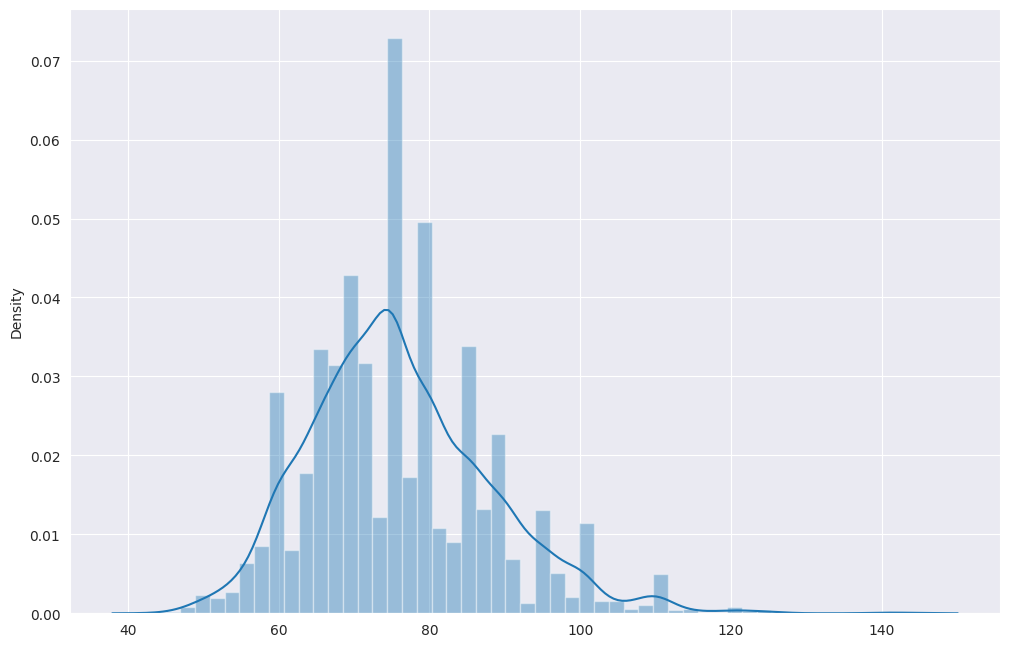

In [ ]:
sns.distplot(x=df.heartRate) # plot the density plot of heartRate to check its distribution

In [ ]:
df['heartRate'].describe()

count    3389.000000
mean       75.977279
std        11.971868
min        45.000000
25%        68.000000
50%        75.000000
75%        83.000000
max       143.000000
Name: heartRate, dtype: float64

In [ ]:
df.heartRate.median()

75.0

In [ ]:
df.heartRate.mode()

0    75.0
dtype: float64

In [ ]:
df.heartRate.mean()

75.97727943346119

In [ ]:
df.heartRate.median()

75.0

In [ ]:
# Replace the null value with median (or mode or mean because they are all equal)
df.heartRate.fillna(df.heartRate.median(),inplace=True) 

Treatment of **totChol**

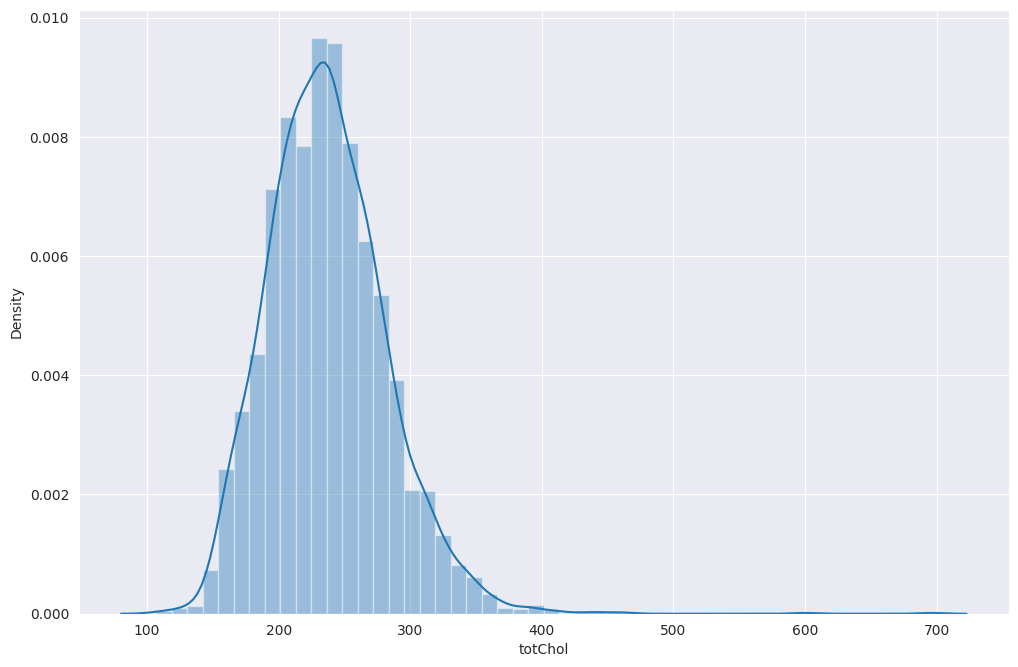

In [ ]:
ax=sns.distplot(df.totChol,kde=True)


In [ ]:
df.totChol.describe()

count    3352.000000
mean      237.074284
std        45.247430
min       107.000000
25%       206.000000
50%       234.000000
75%       264.000000
max       696.000000
Name: totChol, dtype: float64

In [ ]:
df.totChol.mode()

0    240.0
dtype: float64

In [ ]:
df.totChol.median()

234.0

In [ ]:
df.totChol.fillna(df.totChol.median(),inplace=True) #Here the totChol shows a positive skew data so, replace the null value with median

Treatment of **glucose** column

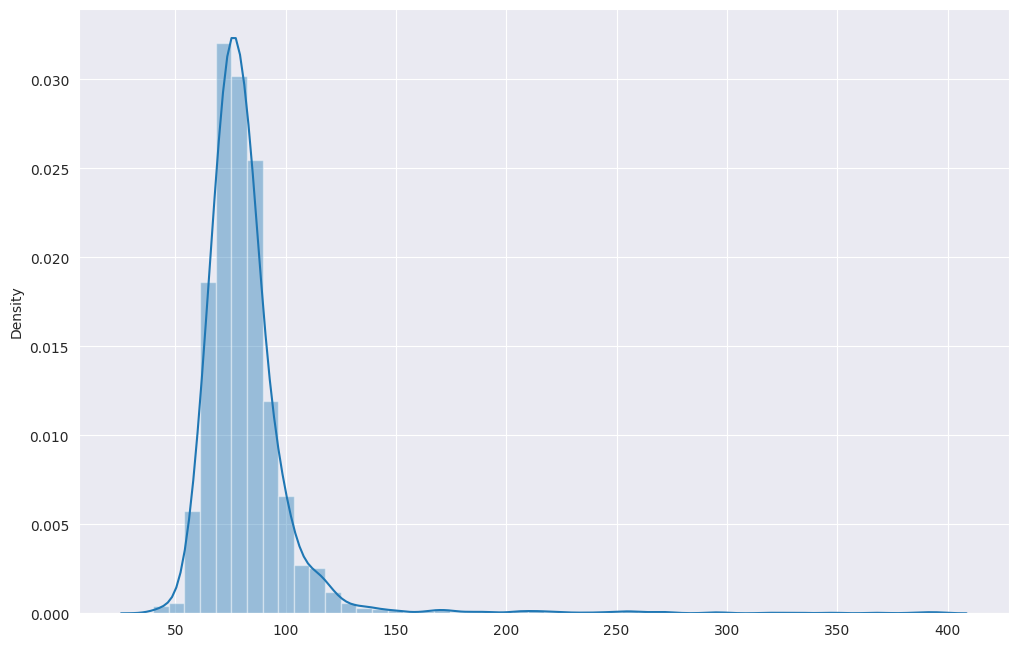

In [ ]:
sns.distplot(x=df.glucose, kde=True)

In [ ]:
df.glucose.describe()

count    3086.000000
mean       82.086520
std        24.244753
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64

The above density plot shows the distribution is slightly positive skewed. So, replace the null value with median.

In [ ]:
df.glucose.fillna(df.glucose.median(), inplace=True)

Treatment of **BMI** column

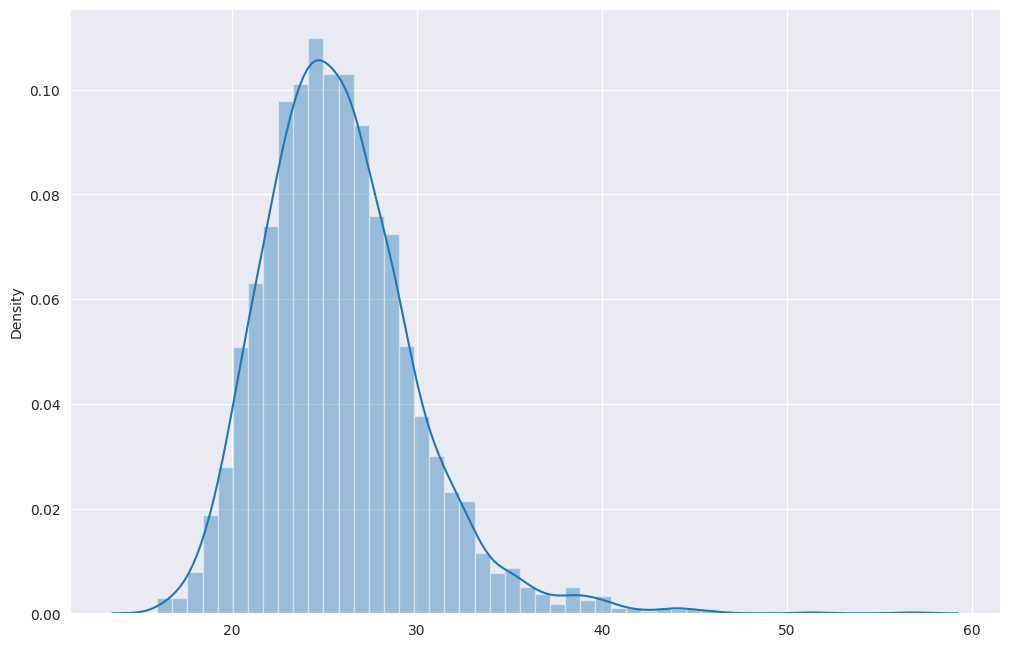

In [ ]:
sns.distplot(x=df.BMI)

In [ ]:
df.BMI.fillna(df.BMI.median(),inplace=True) # Here, BMI feature shows that its distribiution is slightly skewed so, replace null value with median

In [ ]:
df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

In **education** column, the null values are replaced by mode because this column is categorical.

In **cigsPerDay** feature, the missing values are treated using mode because it contains a fixed number of integers.

In **BPMeds**, the null values are treated using the mode (which is 0) because lots of people are not on the blood pressure medication.

The **totChol** column represents a numerical column so, we replaced the null values with median because the distribution is slightly positive skewed.

The column **glucode**, we treat missing value with median because it shows a numerical column.

In **BMI** column, we replace the missing value with median because it is a numerical column.
The **heartRate** column has only one null value, and its mode, median, and mean are approximately equal. So, we can treat with any of these three parameters.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

In [ ]:
df.describe().columns.to_list()

['id',
 'age',
 'education',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD']

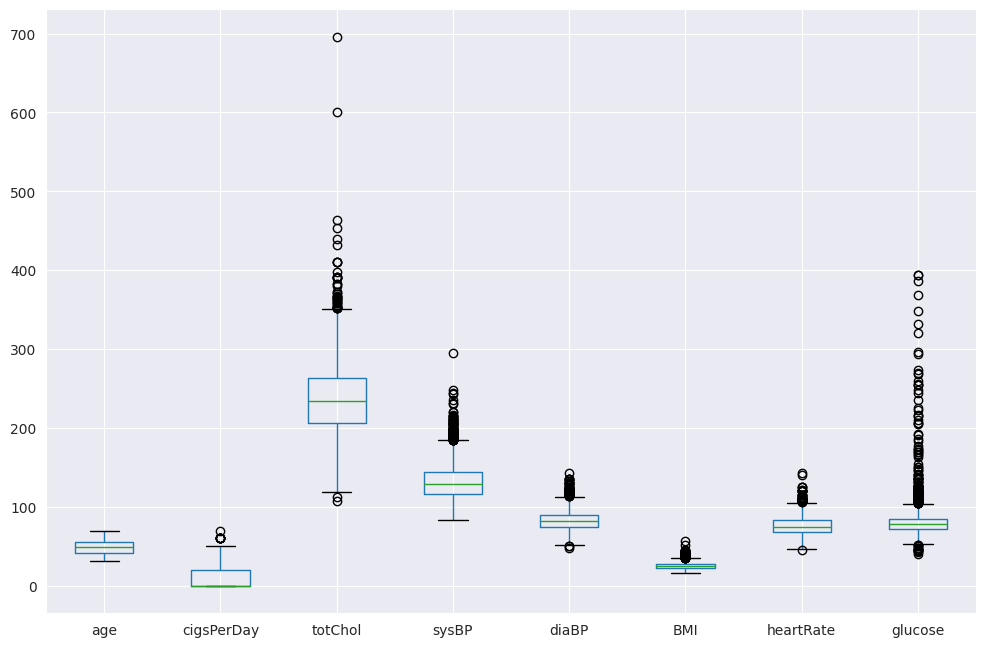

In [ ]:
# for col in df.describe().columns.to_list():
#   plt.subplots(1,1)
#   ax=sns.boxplot(y=df[col])
#   ax.set_title(f'The boxplot of {col}')
box_df=df[[ 'age','cigsPerDay','totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]
box_df.boxplot()
plt.rcParams.update({'figure.figsize':(12,10),'figure.dpi':100})

In [ ]:
dff = df.copy()
dff

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
0        0   64        2.0   F        YES         3.0     0.0   
1        1   36        4.0   M         NO         0.0     0.0   
2        2   46        1.0   F        YES        10.0     0.0   
3        3   50        1.0   M        YES        20.0     0.0   
4        4   64        1.0   F        YES        30.0     0.0   
...    ...  ...        ...  ..        ...         ...     ...   
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3388  3388   60        1.0   M         NO         0.0     0.0   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    221.0  148.0   85.0  25.38   
1                   0             1         0    212.0  168.0   98.0  29.77   
2                   0             0         0    250.0  116.0   71.0  20.35   
3                   0             1         0    233.0  158.0   88.0  28.26   
4                   0             0         0    241.0  136.5   85.0  26.42   
...               ...           ...       ...      ...    ...    ...    ...   
3385                0             0         0    261.0  123.5   79.0  29.28   
3386                0             0         0    199.0  102.0   56.0  21.96   
3387                0             1         0    352.0  164.0  119.0  28.92   
3388                0             1         0    191.0  167.0  105.0  23.01   
3389                0             0         0    288.0  124.0   77.0  29.88   

      heartRate  glucose  TenYearCHD  
0          90.0     80.0           1  
1          72.0     75.0           0  
2          88.0     94.0           0  
3          68.0     94.0           1  
4          70.0     77.0           0  
...         ...      ...         ...  
3385       70.0    103.0           0  
3386       80.0     84.0           0  
3387       73.0     72.0           1  
3388       80.0     85.0           0  
3389       79.0     92.0           0  

[3390 rows x 17 columns]

In [ ]:
'''def cap_data(df):
    for col in df.columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.05,0.95]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

#final_df=cap_data(df[[ 'age','cigsPerDay','totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']])'''

'def cap_data(df):\n    for col in df.columns:\n        print("capping the ",col)\n        if (((df[col].dtype)==\'float64\') | ((df[col].dtype)==\'int64\')):\n            percentiles = df[col].quantile([0.05,0.95]).values\n            df[col][df[col] <= percentiles[0]] = percentiles[0]\n            df[col][df[col] >= percentiles[1]] = percentiles[1]\n        else:\n            df[col]=df[col]\n    return df\n\n#final_df=cap_data(df[[ \'age\',\'cigsPerDay\',\'totChol\', \'sysBP\', \'diaBP\', \'BMI\', \'heartRate\', \'glucose\']])'

In [ ]:
#cap_data(df[['age','cigsPerDay','totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']])

In [ ]:
def cap_outliers(df, columns, lower_threshold, upper_threshold):
    for col in columns:
        lower_cap = df[col].quantile(lower_threshold)
        upper_cap = df[col].quantile(upper_threshold)
        df[col] = df[col].clip(lower_cap, upper_cap)
    return df

columns_to_cap = ['age','cigsPerDay','totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
capped_df = cap_outliers(df, columns_to_cap, lower_threshold=0.05, upper_threshold=0.95)


In [ ]:
df.cigsPerDay.describe()

count    3390.000000
mean        8.512389
std        10.585444
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        30.000000
Name: cigsPerDay, dtype: float64

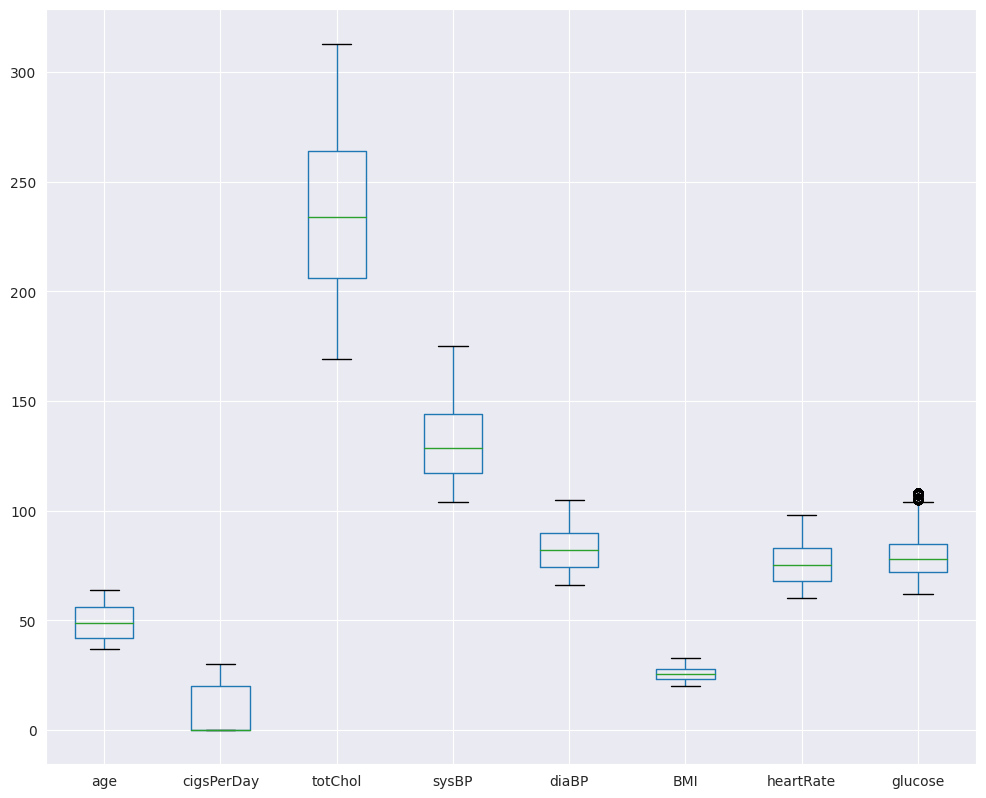

In [ ]:
box_df=df[[ 'age','cigsPerDay','totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]
box_df.boxplot()
plt.rcParams.update({'figure.figsize':(12,10),'figure.dpi':100})

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

In [ ]:
categorical_col=set(list(df.columns))-set(list(df.describe().columns.to_list()))
categorical_col

{'is_smoking', 'sex'}

In [ ]:
df.is_smoking.unique()

array(['YES', 'NO'], dtype=object)

In [ ]:
df.sex.unique()

array(['F', 'M'], dtype=object)

In [ ]:
#np.where(condition, x, y)

df["sex"] = np.where(df.sex=='M', 1, 0)
df["is_smoking"] = np.where(df.is_smoking=='YES',1,0)

In [ ]:
df['sex'].describe()

count    3390.000000
mean        0.432743
std         0.495529
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: sex, dtype: float64

In [ ]:
df.drop(['id'],axis=1, inplace=True)

In [ ]:
df.head()

age  education  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0  64.0        2.0    0           1         3.0     0.0                0   
1  37.0        4.0    1           0         0.0     0.0                0   
2  46.0        1.0    0           1        10.0     0.0                0   
3  50.0        1.0    1           1        20.0     0.0                0   
4  64.0        1.0    0           1        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0  25.38       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

#### What all categorical encoding techniques have you used & why did you use those techniques?

There are two categorical columns in dataset i.e 'sex' and 'is_smoking'. I used binary encoding to treat these columns.
If sex="M", it is replaced with 1 else zero. If 'is_smoking'='YES' it is encoded as 1 else 0.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
def read_blood_pressure(df):
    # Create new column to store the hypertension category
    df['hypertension_category'] = None
    # Iterate over each row in the dataframe
    for i, row in df.iterrows():
        # Get the systolic and diastolic values from the dataframe rows
        systolic = row['sysBP']
        diastolic = row['diaBP']
        # Check for hypertension category
        if systolic < 120 and diastolic < 80:
            df.loc[i, 'hypertension_category'] = 'normalBP'
        elif systolic >= 120 and systolic < 129 and diastolic < 80:
            df.loc[i, 'hypertension_category'] = 'elevatedBP'
        elif (systolic >= 130 and systolic < 139) or (diastolic >= 80 and diastolic < 89):
            df.loc[i, 'hypertension_category'] = 'stage1_hypertension'
        elif (systolic >= 140 and systolic < 179) or (diastolic >= 90 and diastolic < 119):
            df.loc[i, 'hypertension_category'] = 'stage2_hypertension'
        else:
            df.loc[i, 'hypertension_category'] = 'critical'
    return df


In [ ]:
read_blood_pressure(df)

age  education  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0     64.0        2.0    0           1         3.0     0.0                0   
1     37.0        4.0    1           0         0.0     0.0                0   
2     46.0        1.0    0           1        10.0     0.0                0   
3     50.0        1.0    1           1        20.0     0.0                0   
4     64.0        1.0    0           1        30.0     0.0                0   
...    ...        ...  ...         ...         ...     ...              ...   
3385  60.0        1.0    0           0         0.0     0.0                0   
3386  46.0        1.0    0           0         0.0     0.0                0   
3387  44.0        3.0    1           1         3.0     0.0                0   
3388  60.0        1.0    1           0         0.0     0.0                0   
3389  54.0        3.0    0           0         0.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
0                0         0    221.0  148.0   85.0  25.38       90.0   
1                1         0    212.0  168.0   98.0  29.77       72.0   
2                0         0    250.0  116.0   71.0  20.35       88.0   
3                1         0    233.0  158.0   88.0  28.26       68.0   
4                0         0    241.0  136.5   85.0  26.42       70.0   
...            ...       ...      ...    ...    ...    ...        ...   
3385             0         0    261.0  123.5   79.0  29.28       70.0   
3386             0         0    199.0  104.0   66.0  21.96       80.0   
3387             1         0    313.0  164.0  105.0  28.92       73.0   
3388             1         0    191.0  167.0  105.0  23.01       80.0   
3389             0         0    288.0  124.0   77.0  29.88       79.0   

      glucose  TenYearCHD hypertension_category  
0        80.0           1   stage1_hypertension  
1        75.0           0   stage2_hypertension  
2        94.0           0              normalBP  
3        94.0           1   stage1_hypertension  
4        77.0           0   stage1_hypertension  
...       ...         ...                   ...  
3385    103.0           0            elevatedBP  
3386     84.0           0              normalBP  
3387     72.0           1   stage2_hypertension  
3388     85.0           0   stage2_hypertension  
3389     92.0           0            elevatedBP  

[3390 rows x 17 columns]

In [ ]:
# now convert bp variables into number
def encode_bp(df):
    df['hypertension_category'] = df['hypertension_category'].apply(lambda x: 1 if x == 'normalBP' else (2 if x == 'elevatedBP' else (3 if x == 'stage1_hypertension' else (4 if x == 'stage2_hypertension' else (5 if x == 'critical' else x)))))
    return df


In [ ]:
encode_bp(df)

age  education  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0     64.0        2.0    0           1         3.0     0.0                0   
1     37.0        4.0    1           0         0.0     0.0                0   
2     46.0        1.0    0           1        10.0     0.0                0   
3     50.0        1.0    1           1        20.0     0.0                0   
4     64.0        1.0    0           1        30.0     0.0                0   
...    ...        ...  ...         ...         ...     ...              ...   
3385  60.0        1.0    0           0         0.0     0.0                0   
3386  46.0        1.0    0           0         0.0     0.0                0   
3387  44.0        3.0    1           1         3.0     0.0                0   
3388  60.0        1.0    1           0         0.0     0.0                0   
3389  54.0        3.0    0           0         0.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
0                0         0    221.0  148.0   85.0  25.38       90.0   
1                1         0    212.0  168.0   98.0  29.77       72.0   
2                0         0    250.0  116.0   71.0  20.35       88.0   
3                1         0    233.0  158.0   88.0  28.26       68.0   
4                0         0    241.0  136.5   85.0  26.42       70.0   
...            ...       ...      ...    ...    ...    ...        ...   
3385             0         0    261.0  123.5   79.0  29.28       70.0   
3386             0         0    199.0  104.0   66.0  21.96       80.0   
3387             1         0    313.0  164.0  105.0  28.92       73.0   
3388             1         0    191.0  167.0  105.0  23.01       80.0   
3389             0         0    288.0  124.0   77.0  29.88       79.0   

      glucose  TenYearCHD  hypertension_category  
0        80.0           1                      3  
1        75.0           0                      4  
2        94.0           0                      1  
3        94.0           1                      3  
4        77.0           0                      3  
...       ...         ...                    ...  
3385    103.0           0                      2  
3386     84.0           0                      1  
3387     72.0           1                      4  
3388     85.0           0                      4  
3389     92.0           0                      2  

[3390 rows x 17 columns]

#### 2. Feature Selection

In [ ]:
df2=df.copy()

In [ ]:
df2.drop(['sysBP', 'diaBP'], axis=1, inplace=True)

since, cigs_per_day column is already having the information about smokers so we dont need is_smoking column 

In [ ]:
df2.drop(["is_smoking"],axis=1,inplace=True)

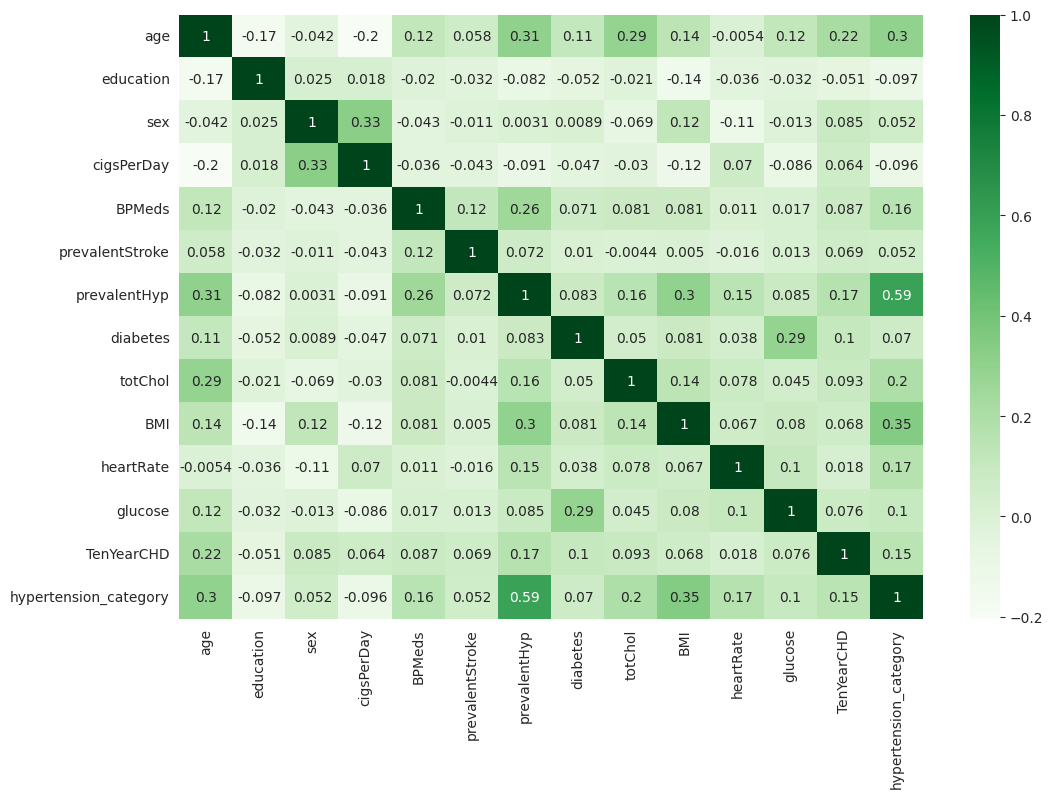

In [ ]:
# Correlation Heatmap visualization code
plt.rcParams.update({'figure.figsize':(12,8),'figure.dpi':100})

sns.heatmap(df2.corr(),cmap= 'Greens',annot=True)

##### What all feature selection methods have you used  and why?

First we checked every variables through Data wrangling and Data visulisation and their relationship between them after that we select feature as per their importance how they affect to Produce CHD.
then we have removed some variables by converting them into one features in the sction of Features manupulation and also we removed some useless variable .

##### Which all features you found important and why?

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Embedded Method of validating the feature importances of selected features
def randomforest_embedded(x,y):
  # Create the random forest eith hyperparameters
  model= RandomForestClassifier(n_estimators=550)
  # Fit the mmodel
  model.fit(x,y)
  # get the importance of thr resulting features
  importances= model.feature_importances_
  # Create a data frame for visualization
  final_df= pd.DataFrame({"Features": pd.DataFrame(x).columns, "Importances": importances})
  final_df.set_index('Importances')
  # Sort in ascending order to better visualization
  final_df= final_df.sort_values('Importances')
  # Plot the feature importances in bars
  # final_df.plot.bar(color='teal')
  return final_df

In [ ]:
# Getting feature importance of selected features
randomforest_embedded(x=df2.drop(["TenYearCHD"],axis=1),y=df["TenYearCHD"])

Features  Importances
5         prevalentStroke     0.005768
7                diabetes     0.010294
4                  BPMeds     0.011061
6            prevalentHyp     0.023458
2                     sex     0.024790
12  hypertension_category     0.046519
1               education     0.050560
3              cigsPerDay     0.069675
10              heartRate     0.128435
11                glucose     0.141719
0                     age     0.152910
8                 totChol     0.162019
9                     BMI     0.172792

Finally we found out 13 indepenedent features which are affecting to devolope CHD and valdate their importances through Embedded method using random forest classifier feature importance and we can see on above graph all the features have some importance none of them are zero.

### 5. Data Transformation

In [ ]:
for column in df2.columns:
    print(column)
    print(df2[column].skew())
    

age
0.19933505114565864
education
0.7352403272651097
sex
0.2716141401804689
cigsPerDay
0.7987202700140527
BPMeds
5.563972386285764
prevalentStroke
12.297612002671828
prevalentHyp
0.7951885864720627
diabetes
6.001977441386289
totChol
0.2009466755219177
BMI
0.33496376508337866
heartRate
0.3967279461624882
glucose
0.7287503478673296
TenYearCHD
1.953181703698407
hypertension_category
-0.3807787326318706


#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

NO, from above skewness result we can see that our data is following gaussian distribution  

so we dont need to transform the data.

### 6. Data Scaling

In [ ]:
df3=df2.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Scaling your data
#applying standardScaler 
scaler = StandardScaler()
columns = ['age', 'cigsPerDay', 'totChol', 'heartRate','hypertension_category', 'BMI', 'heartRate', 'glucose' ]
df3[columns] = scaler.fit_transform(df3[columns])

##### Which method have you used to scale you data and why?

StandardScaler is used to resize the distribution

StandardScaler is a pre-processing technique in machine learning and statistics used to standardize a dataset, meaning it scales the data so that it has a mean of 0 and a standard deviation of 1. This is useful because many machine learning algorithms require that the input data is in a standard scale in order to work properly.

In [ ]:
df3.head(1) #checking scalled data

age  education  sex  cigsPerDay  BPMeds  prevalentStroke  \
0  1.738547        2.0    0   -0.520829     0.0                0   

   prevalentHyp  diabetes   totChol       BMI  heartRate   glucose  \
0             0         0 -0.380748 -0.082252   1.328161  0.012189   

   TenYearCHD  hypertension_category  
0           1               0.277079

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
x, y = df3.loc[:, df3.columns != 'TenYearCHD'], df3['TenYearCHD']

In [ ]:
#importing library to split
from sklearn.model_selection import train_test_split
#dividing the data for training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 0, stratify=y)
print(x_train.shape)
print(x_test.shape)

(2712, 13)
(678, 13)


##### What data splitting ratio have you used and why? 

Here we are taking the data splitting ratio is 80:20, this means that 80% of the data is used for training and 20% of the data is used for testing. This is a commonly used ratio in machine learning as it allows for a sufficient amount of data to be used for training the model, while also reserving a meaningful portion of the data for testing the model's performance on unseen data. This helps ensure that the model is able to generalize well to new, unseen data and has not overfitted to the training data.

### 9. Handling Imbalanced Dataset

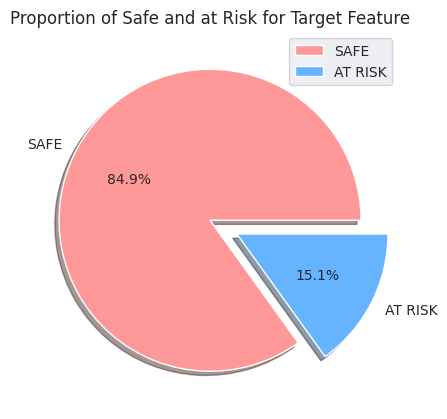

In [ ]:
#lets check data is imbalanced or not
#trying to plot pie chart to show 
plt.figure(figsize=(7,5), dpi=100)
proportion = df['TenYearCHD'].value_counts()
labels = ['SAFE','AT RISK']
plt.title('Proportion of Safe and at Risk for Target Feature')
plt.pie(proportion, explode=(0,0.2),labels=labels, shadow = True, autopct = '%1.1f%%', colors= ['#ff9999','#66b3ff'])
plt.legend()
plt.show()

In [ ]:

# assume your dataframe is 'df'
# # assume the column name is 'class_column'

# # Create a list of the count of examples in each class
# class_counts = df['TenYearCHD'].value_counts()

# # Create a list of the names of each class
# class_names = class_counts.index

# # Create the pie chart
# plt.pie(class_counts, labels=class_names, autopct='%1.1f%%')

# # Add a title
# plt.title("Class Distribution")

# # Display the chart
# plt.show()


##### Do you think the dataset is imbalanced? Explain Why.

Yes as we can see our data is highly imbalanced

Majority of data points belongs to safe (no risk of devoloping CHD "0") class.

In [ ]:
# Handling Imbalanced Dataset (If needed)
#importing library for handling imbalanced
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42) #creating instance

In [ ]:
x_train_imbal, y_train_imbal = smote.fit_resample(x,y) #fitting predictor and target

In [ ]:
x_train_imbal

age  education  sex  cigsPerDay    BPMeds  prevalentStroke  \
0     1.738547   2.000000    0   -0.520829  0.000000                0   
1    -1.502044   4.000000    1   -0.804278  0.000000                0   
2    -0.421847   1.000000    0    0.140554  0.000000                0   
3     0.058241   1.000000    1    1.085387  0.000000                0   
4     1.738547   1.000000    0    2.030220  0.000000                0   
...        ...        ...  ...         ...       ...              ...   
5753  1.341524   3.423018    1    1.830379  0.000000                0   
5754  1.188651   1.000000    0   -0.804278  0.000000                0   
5755  0.896587   1.196988    1   -0.804278  0.000000                0   
5756  0.963239   1.459721    0   -0.114682  0.459721                0   
5757  1.589979   1.000000    0    1.085387  0.000000                0   

      prevalentHyp  diabetes   totChol       BMI  heartRate   glucose  \
0                0         0 -0.380748 -0.082252   1.328161  0.012189   
1                1         0 -0.608906  1.171243  -0.361461 -0.417344   
2                0         0  0.354425 -1.518488   1.140426  1.214882   
3                1         0 -0.076539  0.740087  -0.736932  1.214882   
4                0         0  0.126268  0.214704  -0.549196 -0.245531   
...            ...       ...       ...       ...        ...       ...   
5753             1         0 -0.310493  0.424600  -0.422918  0.914274   
5754             1         0  0.733764  1.478642   1.956228  2.002067   
5755             0         0  0.538020 -0.123219  -1.487875 -0.711497   
5756             1         0  0.473855  0.114331  -0.295622  1.254375   
5757             0         0 -0.078413 -1.564487  -1.450666  1.049879   

      hypertension_category  
0                  0.277079  
1                  1.173358  
2                 -1.515477  
3                  0.277079  
4                  0.277079  
...                     ...  
5753               1.173358  
5754               1.173358  
5755              -0.619199  
5756               0.277079  
5757               0.348137  

[5758 rows x 13 columns]

In [ ]:
y_train_imbal

0       1
1       0
2       0
3       1
4       0
       ..
5753    1
5754    1
5755    1
5756    1
5757    1
Name: TenYearCHD, Length: 5758, dtype: int64

In [ ]:
#now lets check length of our dataset
#after and before
print("balanced data shape (resampled)" , len(x_train_imbal))
print("Original data shape" , len(x_train))

balanced data shape (resampled) 5758
Original data shape 2712


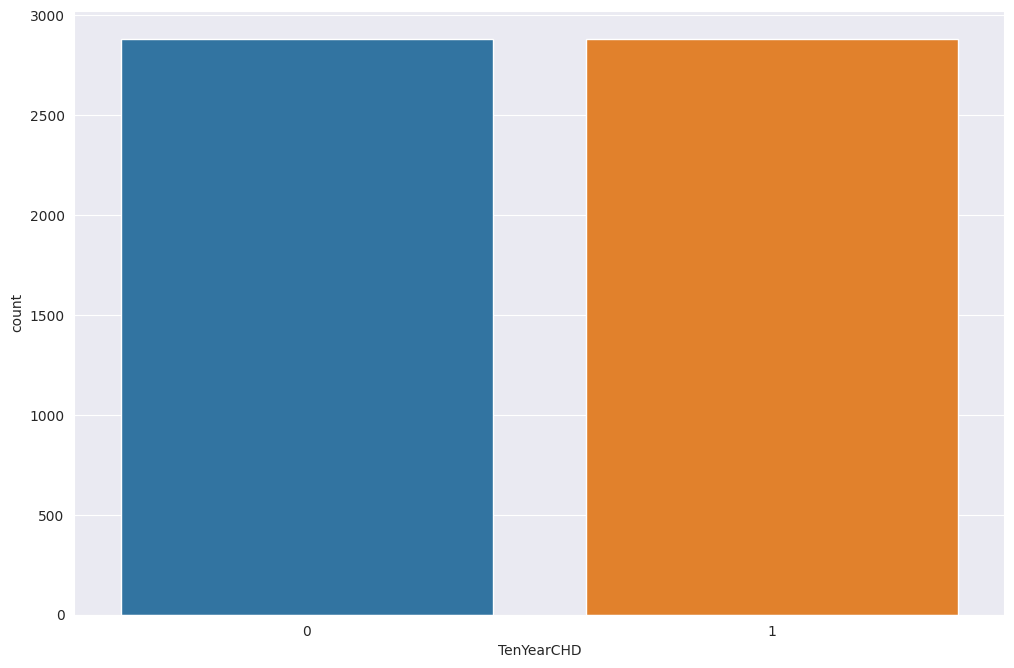

In [ ]:
sns.countplot(y_train_imbal) #checking through plot

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

SMOTE (Synthetic Minority Over-sampling Technique) is a popular method for oversampling in machine learning. It is used to balance the class distribution by generating synthetic samples for the minority class. The synthetic samples are created by interpolating between existing minority class samples. The interpolation is done by selecting two or more nearest minority class samples and taking the linear combination of their feature values. This allows for the creation of new samples that are similar to the existing minority class samples, thereby increasing the overall number of minority class samples and balancing the class distribution.

## ***7. ML Model Implementation***

### ML Model 1 - **Decision Tree Classifier**

In [ ]:
# ML Model - 1 Implementation

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
# Fit the Algorithm

# Predict on the model



In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( x_train_imbal,y_train_imbal , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(4606, 13)
(1152, 13)


In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
# Get the model coefficients
clf.coef_

array([[ 0.67175316, -0.03670567, -0.20367296,  0.45905879,  0.47509739,
        -0.52028117, -0.20140483,  0.21041854,  0.11636448,  0.05401961,
        -0.08405689,  0.13322231,  0.38263325]])

In [ ]:
clf.intercept_

array([-0.08268641])

In [ ]:
# Get the predicted probabilities
train_preds = clf.predict_proba(X_train)
test_preds = clf.predict_proba(X_test)
test_preds

array([[0.54531   , 0.45469   ],
       [0.7702562 , 0.2297438 ],
       [0.2231144 , 0.7768856 ],
       ...,
       [0.55419874, 0.44580126],
       [0.88921053, 0.11078947],
       [0.44310699, 0.55689301]])

In [ ]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [ ]:
test_class_preds 

array([0, 0, 1, ..., 0, 0, 1])

In [ ]:
y_test.value_counts()

1    599
0    553
Name: TenYearCHD, dtype: int64

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

from sklearn.metrics import accuracy_score, confusion_matrix
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.673469387755102
The accuracy on test data is  0.6640625


[[1512  814]
 [ 690 1590]]


[Text(0, 0.5, 'NoCHD'), Text(0, 1.5, 'CHD')]

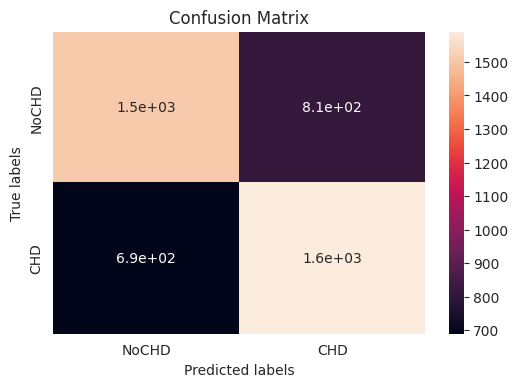

In [ ]:
# Get the confusion matrix for both train and test

labels = ['NoCHD', 'CHD']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)
plt.figure(figsize=(6,4))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[355 198]
 [189 410]]


[Text(0, 0.5, 'NoCHD'), Text(0, 1.5, 'CHD')]

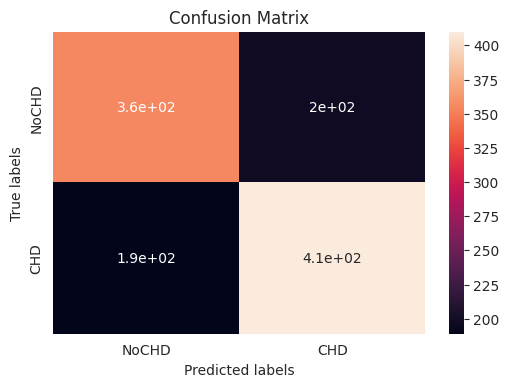

In [ ]:
# Get the confusion matrix for both train and test

labels = ['NoCHD', 'CHD']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)
plt.figure(figsize=(6,4))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 1 - **Implementing Logistic Regression**

In [ ]:
# ML Model - 1 Implementation
clf = LogisticRegression(fit_intercept=True, max_iter=10000)
# Fit the Algorithm
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
# Checking the coefficients
clf.coef_

array([[ 0.67175316, -0.03670567, -0.20367296,  0.45905879,  0.47509739,
        -0.52028117, -0.20140483,  0.21041854,  0.11636448,  0.05401961,
        -0.08405689,  0.13322231,  0.38263325]])

In [ ]:
# Checking the intercept value
clf.intercept_

array([-0.08268641])

In [ ]:
# Predict on the model
# Get the predicted probabilities
train_preds = clf.predict_proba(X_train)
test_preds = clf.predict_proba(X_test)

In [ ]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.673469387755102
The accuracy on test data is  0.6640625


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[1512  814]
 [ 690 1590]]


[Text(0, 0.5, 'NoCHD'), Text(0, 1.5, 'CHD')]

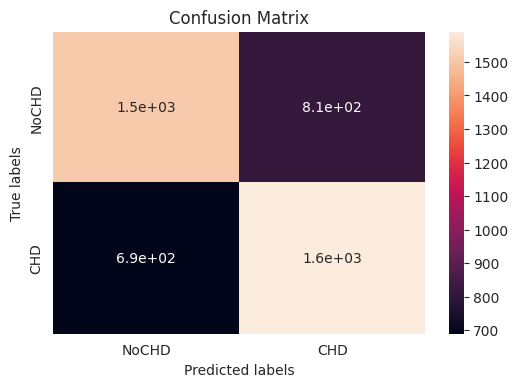

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for both train and test

labels = ['NoCHD', 'CHD']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

plt.figure(figsize=(6,4))

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[355 198]
 [189 410]]


[Text(0, 0.5, 'NoCHD'), Text(0, 1.5, 'CHD')]

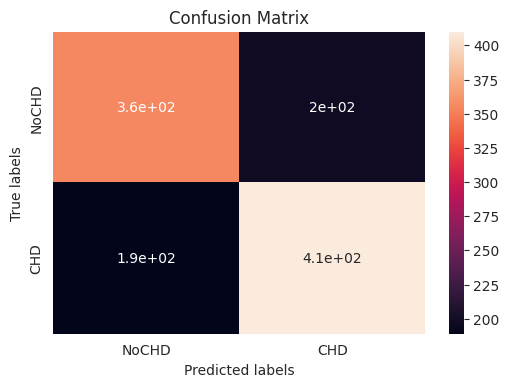

In [ ]:
# Get the confusion matrix for both train and test

labels = ['NoCHD', 'CHD']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

plt.figure(figsize=(6,4))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print(metrics.classification_report(y_train,train_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.69      0.65      0.67      2326
           1       0.66      0.70      0.68      2280

    accuracy                           0.67      4606
   macro avg       0.67      0.67      0.67      4606
weighted avg       0.67      0.67      0.67      4606

 
roc_auc_score
0.6737057066570121


In [ ]:
print(metrics.classification_report(y_test,test_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.65      0.64      0.65       553
           1       0.67      0.68      0.68       599

    accuracy                           0.66      1152
   macro avg       0.66      0.66      0.66      1152
weighted avg       0.66      0.66      0.66      1152

 
roc_auc_score
0.6632135536321838


I used Logistic regression algorithm to create the model. As I got not so good result. 

For training dataset, i found precision of 98% and recall of 87% and f1-score of 92% for False Churn customer data. BUt, I am also interested to see the result for Churning cutomer result as I got precision of 18% and recall of 57% and f1-score of 27%. Accuracy is 86% and average percision, recall & f1_score are 58%, 72% and 60% respectively with a roc auc score of 57%.

For testing dataset, i found precision of 98% and recall of 88% and f1-score of 93% for False Churn customer data. BUt, I am also interested to see the result for Churning cutomer result as I got precision of 17% and recall of 56% and f1-score of 27%. Accuracy is 87% and average percision, recall & f1_score are 58%, 72% and 60% respectively with a roc auc score of 57%.

Next tryting to improving the score by using hyperparameter tuning technique.



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
model = LogisticRegression(max_iter=10000)
solvers = ['lbfgs']
penalty = ['10','l2','14','16','20','18']
c_values = [1000,100, 10, 1.0, 0.1, 0.01,0.001]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

# Fit the Algorithm
grid_result=grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


# Predict on the model
# Get the predicted classes
train_class_preds = grid_result.predict(X_train)
test_class_preds = grid_result.predict(X_test)

Best: 0.674635 using {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:
print(metrics.classification_report(y_train,train_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.69      0.65      0.67      2326
           1       0.66      0.70      0.68      2280

    accuracy                           0.67      4606
   macro avg       0.67      0.67      0.67      4606
weighted avg       0.67      0.67      0.67      4606

 
roc_auc_score
0.6737057066570121


In [ ]:
print(metrics.classification_report(y_test,test_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.65      0.64      0.65       553
           1       0.67      0.68      0.68       599

    accuracy                           0.66      1152
   macro avg       0.66      0.66      0.66      1152
weighted avg       0.66      0.66      0.66      1152

 
roc_auc_score
0.6632135536321838


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.  But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. 
Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model. 

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

For training dataset, i found precision of 98% and recall of 87% and f1-score of 92% for False Churn customer data. BUt, I am also interested to see the result for Churning cutomer result as I got precision of 19% and recall of 57% and f1-score of 28%. Accuracy is 87% and average percision, recall & f1_score are 58%, 72% and 60% respectively with a roc auc score of 58%.

Quite improvment seen in precsion, f1 score,accuracy and roc auc score for training dataset of 1%.

For testing dataset, i found precision of 98% and recall of 88% and f1-score of 93% for False Churn customer data. BUt, I am also interested to see the result for Churning cutomer result as I got precision of 19% and recall of 55% and f1-score of 28%. Accuracy is 87% and average percision, recall & f1_score are 58%, 72% and 60% respectively with a roc auc score of 58%.

Quite improvemnt seen in precsion, f1 score and roc auc of 1% but 1% decrement in recall.



### ML Model - 2 - **Implementing Random Forest Classifier**

In [ ]:
# ML Model - 2 Implementation
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Fit the Algorithm
rf_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data
train_class_preds = rf_model.predict(X_train)
test_class_preds = rf_model.predict(X_test)

In [ ]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 1.0
The accuracy on test dataset is 0.8958333333333334


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[2326    0]
 [   0 2280]]


[Text(0, 0.5, 'NoCHD'), Text(0, 1.5, 'CHD')]

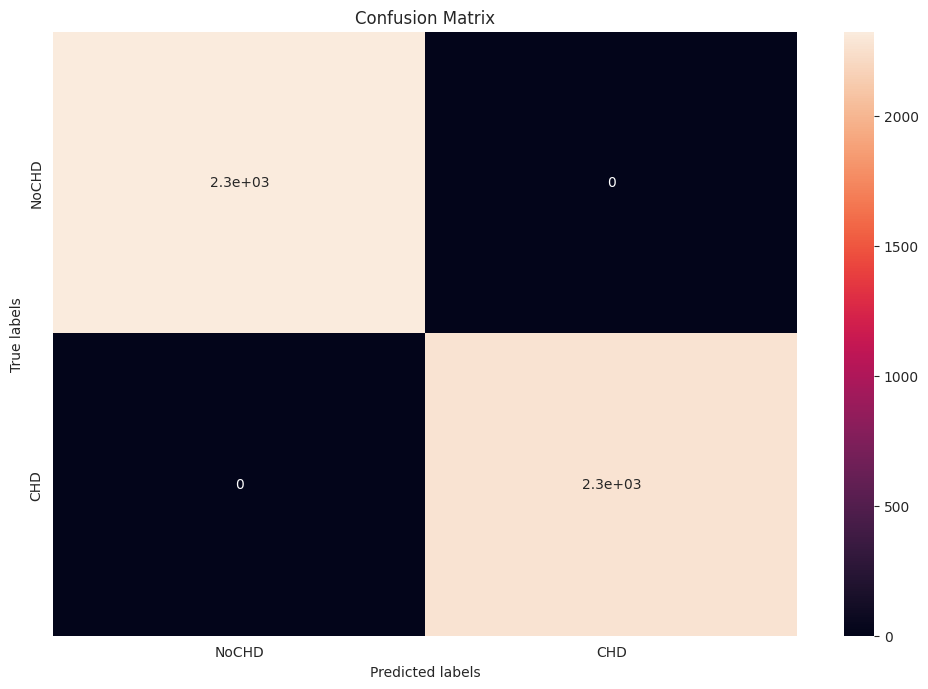

In [ ]:

# Visualizing evaluation Metric Score chart# Get the confusion matrix for both train and test

labels = ['NoCHD', 'CHD']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
y_test.value_counts()

1    599
0    553
Name: TenYearCHD, dtype: int64

In [ ]:
len(test_class_preds)

1152

[[499  54]
 [ 66 533]]


[Text(0, 0.5, 'NoCHD'), Text(0, 1.5, 'CHD')]

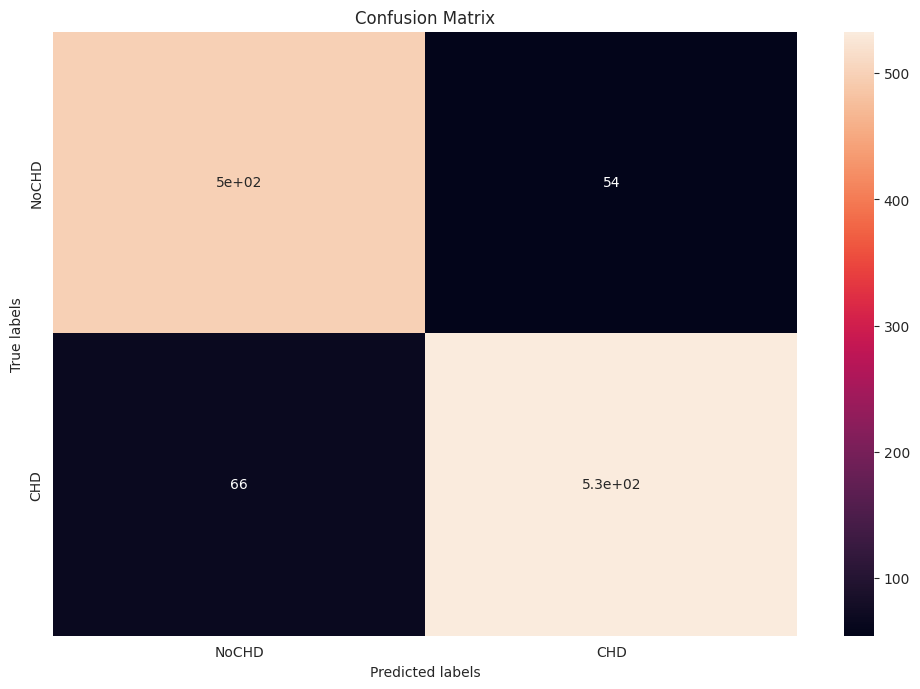

In [ ]:
# Get the confusion matrix for both train and test

labels = ['NoCHD', 'CHD']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print(metrics.classification_report(y_train,train_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2326
           1       1.00      1.00      1.00      2280

    accuracy                           1.00      4606
   macro avg       1.00      1.00      1.00      4606
weighted avg       1.00      1.00      1.00      4606

 
roc_auc_score
1.0


In [ ]:
print(metrics.classification_report(y_test,test_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       553
           1       0.91      0.89      0.90       599

    accuracy                           0.90      1152
   macro avg       0.90      0.90      0.90      1152
weighted avg       0.90      0.90      0.90      1152

 
roc_auc_score
0.8960835871721102


Then, I used Random Forest algorithm to create the model. As I got there is overfitting seen.

For training dataset, i found precision of 100% and recall of 100% and f1-score of 100% for False Churn customer data. BUt, I am also interested to see the result for Churning cutomer result as I got precision of 100% and recall of 100% and f1-score of 100%. Accuracy is 100% and average percision, recall & f1_score are 100%, 100% and 100% respectively with a roc auc score of 100%.

For testing dataset, i found precision of 98% and recall of 91% and f1-score of 94% for False Churn customer data. BUt, I am also interested to see the result for Churning cutomer result as I got precision of 38% and recall of 75% and f1-score of 50%. Accuracy is 90% and average percision, recall & f1_score are 68%, 83% and 72% respectively with a roc auc score of 67%.

Next tryting to improving the score by using hyperparameter tuning technique.

In [ ]:
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
0                     age                0.18
8                 totChol                0.13
9                     BMI                0.12
10              heartRate                0.12
11                glucose                0.12
12  hypertension_category                0.12
3              cigsPerDay                0.09
1               education                0.08
2                     sex                0.02
6            prevalentHyp                0.02
4                  BPMeds                0.01
5         prevalentStroke                0.00
7                diabetes                0.00

In [ ]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

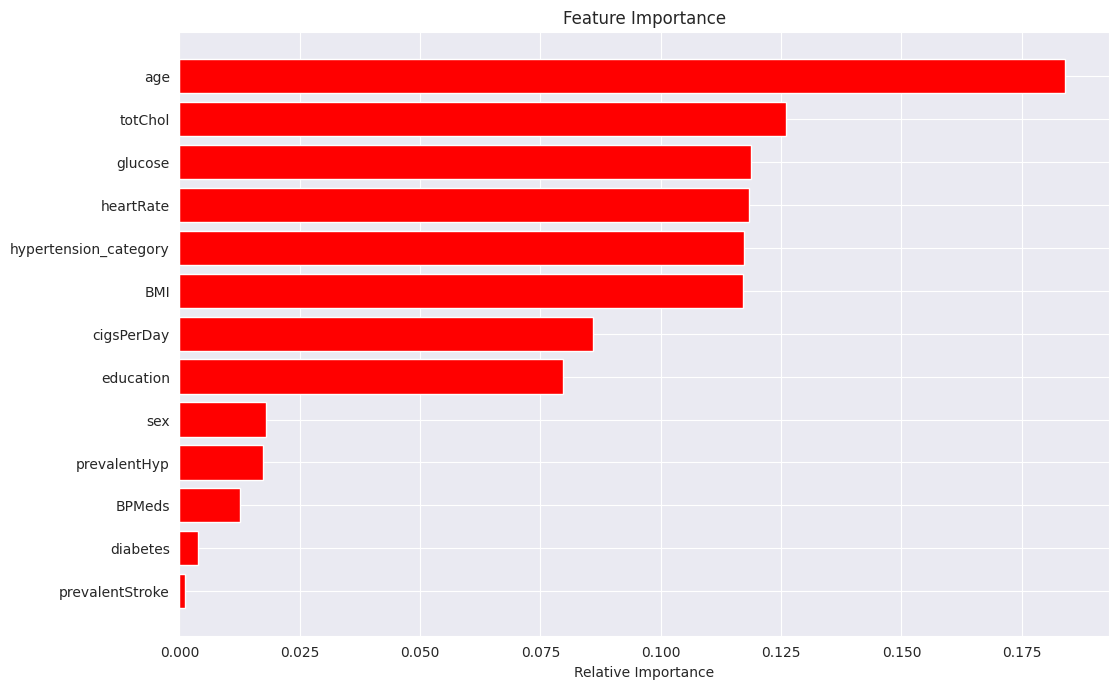

In [ ]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='f1')


# Fit the Algorithm
rf_grid.fit(X_train,y_train)



# Predict on the model
# Making predictions on train and test data
train_class_preds = rf_grid.predict(X_train)
test_class_preds = rf_grid.predict(X_test)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.3s
[CV] END max_depth=4, min_sam

In [ ]:
print("Best: %f using %s" % (rf_grid.best_score_, rf_grid.best_params_))

Best: 0.749902 using {'max_depth': 8, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 80}


[[1808  518]
 [ 500 1780]]


[Text(0, 0.5, 'NoCHD'), Text(0, 1.5, 'CHD')]

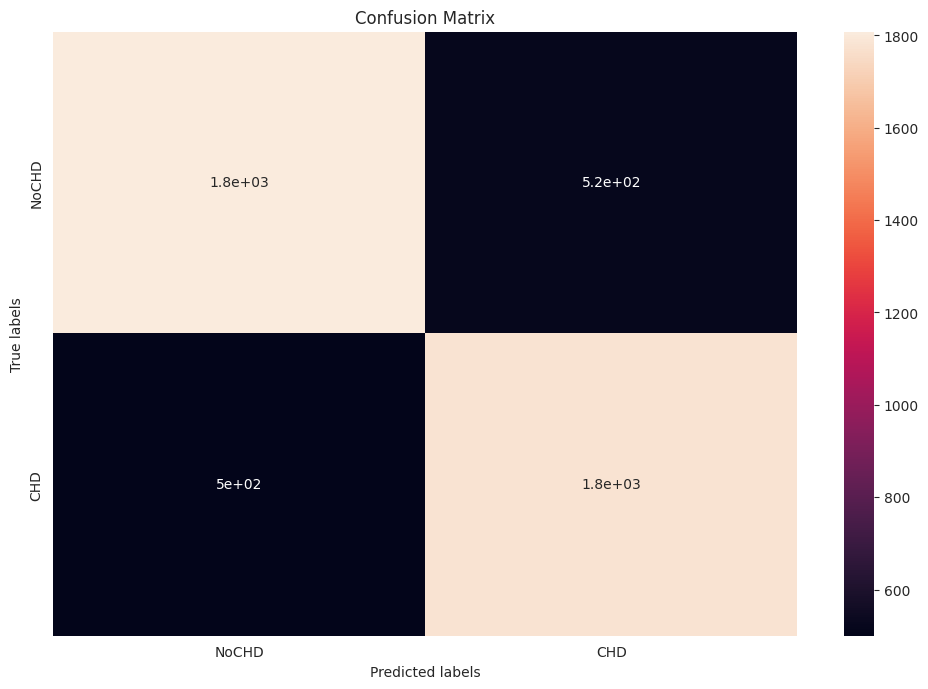

In [ ]:

# Visualizing evaluation Metric Score chart# Get the confusion matrix for both train and test

labels = ['NoCHD', 'CHD']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[402 151]
 [152 447]]


[Text(0, 0.5, 'NoCHD'), Text(0, 1.5, 'CHD')]

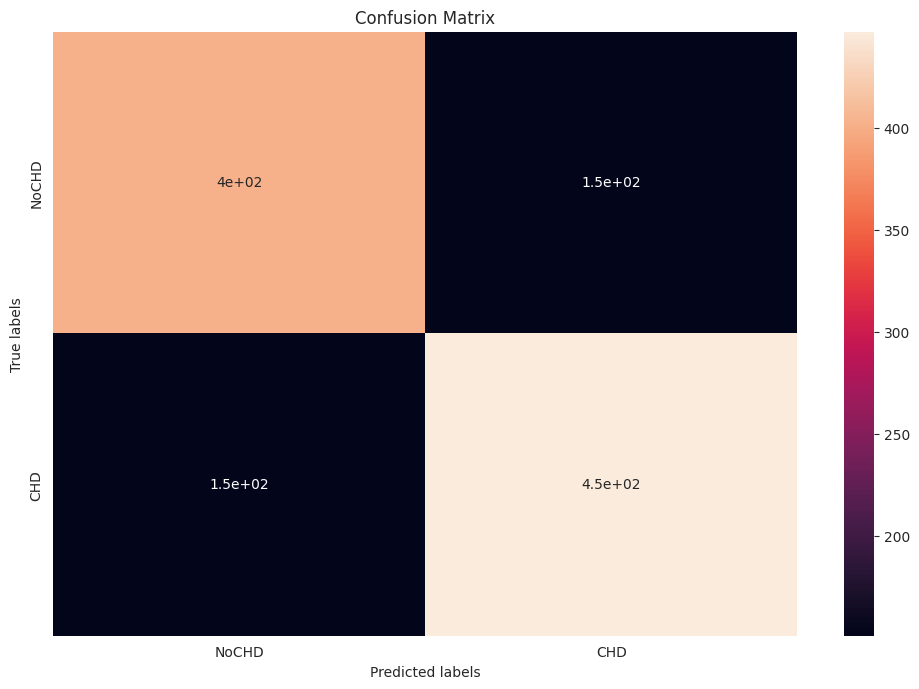

In [ ]:
# Get the confusion matrix for both train and test

labels =['NoCHD', 'CHD']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print(metrics.classification_report(y_train,train_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      2326
           1       0.77      0.78      0.78      2280

    accuracy                           0.78      4606
   macro avg       0.78      0.78      0.78      4606
weighted avg       0.78      0.78      0.78      4606

 
roc_auc_score
0.7790009201852439


In [ ]:
# Hypertuned Random Forest
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73       554
           1       0.75      0.75      0.75       598

    accuracy                           0.74      1152
   macro avg       0.74      0.74      0.74      1152
weighted avg       0.74      0.74      0.74      1152

 
roc_auc_score
0.7365938408498794


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.  But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. 
Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model. 

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

For training dataset, i found precision of 100% and recall of 87% and f1-score of 93% for False Churn customer data. BUt, I am also interested to see the result for Churning cutomer result as I got precision of 12% and recall of 93% and f1-score of 22%. Accuracy is 88% and average percision, recall & f1_score are 56%, 90% and 57% respectively with a roc auc score of 56%.

Quite improvment seen as no overfitting but the scores reduced by some percentages.

For testing dataset, i found precision of 100% and recall of 88% and f1-score of 93% for False Churn customer data. BUt, I am also interested to see the result for Churning cutomer result as I got precision of 13% and recall of 90% and f1-score of 23%. Accuracy is 88% and average percision, recall & f1_score are 56%, 89% and 58% respectively with a roc auc score of 56%.

Quite improvemnt seen in recall but rest scores have decreased.


### ML Model - 3 - **Implementing XgBoost Classifier**

In [ ]:
# ML Model - 3 Implementation
# Create an instance of the RandomForestClassifier
xg_model = XGBClassifier()

# Fit the Algorithm
xg_models=xg_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data

train_class_preds = xg_models.predict(X_train)
test_class_preds = xg_models.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[2045  281]
 [ 388 1892]]


[Text(0, 0.5, 'NoCHD'), Text(0, 1.5, 'CHD')]

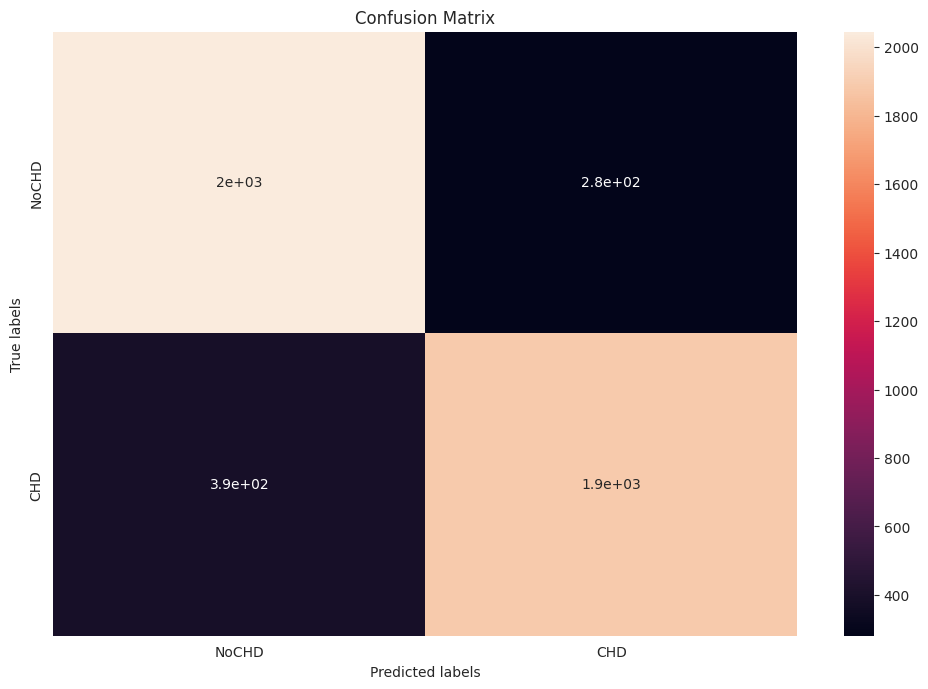

In [ ]:
# Visualizing evaluation Metric Score chart
# Visualizing evaluation Metric Score chart# Get the confusion matrix for both train and test

labels = ['NoCHD', 'CHD']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[469  84]
 [108 491]]


[Text(0, 0.5, 'NoCHD'), Text(0, 1.5, 'CHD')]

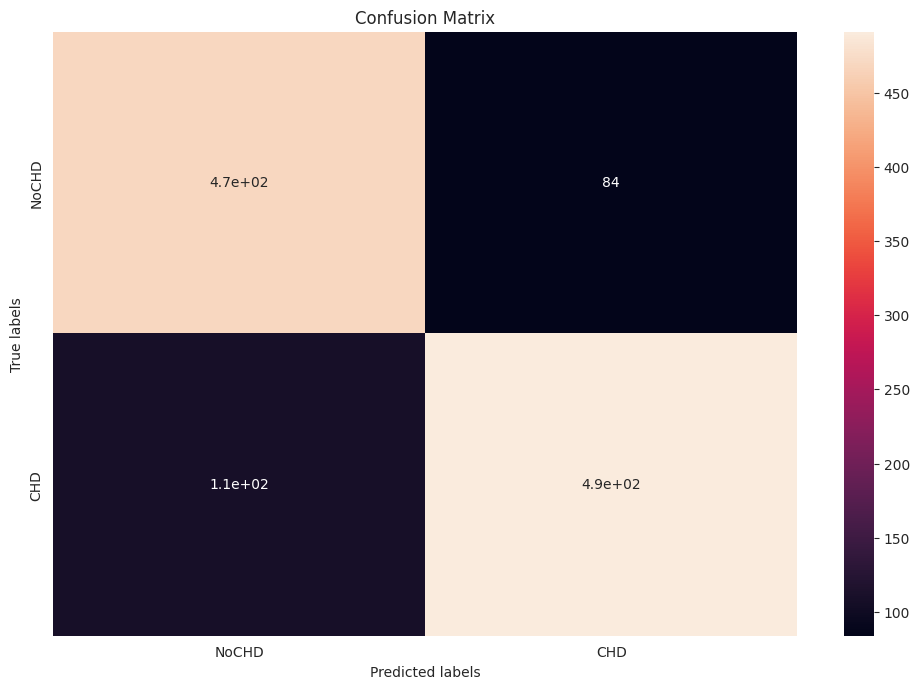

In [ ]:
# Get the confusion matrix for both train and test

labels = ['NoCHD', 'CHD']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print(metrics.classification_report(y_train,train_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      2326
           1       0.87      0.83      0.85      2280

    accuracy                           0.85      4606
   macro avg       0.86      0.85      0.85      4606
weighted avg       0.86      0.85      0.85      4606

 
roc_auc_score
0.8545081534446607


In [ ]:
print(metrics.classification_report(y_test,test_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       553
           1       0.85      0.82      0.84       599

    accuracy                           0.83      1152
   macro avg       0.83      0.83      0.83      1152
weighted avg       0.83      0.83      0.83      1152

 
roc_auc_score
0.8339003824940302


Then, I used XGBoost algorithm to create the model. As I got there  good result.

For training dataset, i found precision of 100% and recall of 91% and f1-score of 95% for False Churn customer data. BUt, I am also interested to see the result for Churning cutomer result as I got precision of 46% and recall of 95% and f1-score of 62%. Accuracy is 92% and average percision, recall & f1_score are 73%, 93% and 79% respectively with a roc auc score of 72%.

For testing dataset, i found precision of 99% and recall of 90% and f1-score of 94% for False Churn customer data. BUt, I am also interested to see the result for Churning cutomer result as I got precision of 35% and recall of 80% and f1-score of 48%. Accuracy is 90% and average percision, recall & f1_score are 67%, 85% and 71% respectively with a roc auc score of 66%.

Next tryting to improving the score by using hyperparameter tuning technique.

In [ ]:
importances = xg_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
12  hypertension_category                0.20
0                     age                0.16
1               education                0.16
3              cigsPerDay                0.11
10              heartRate                0.08
4                  BPMeds                0.07
2                     sex                0.05
6            prevalentHyp                0.05
11                glucose                0.05
8                 totChol                0.03
9                     BMI                0.03
7                diabetes                0.02
5         prevalentStroke                0.00

In [ ]:
features = X_train.columns
importances = xg_model.feature_importances_
indices = np.argsort(importances)

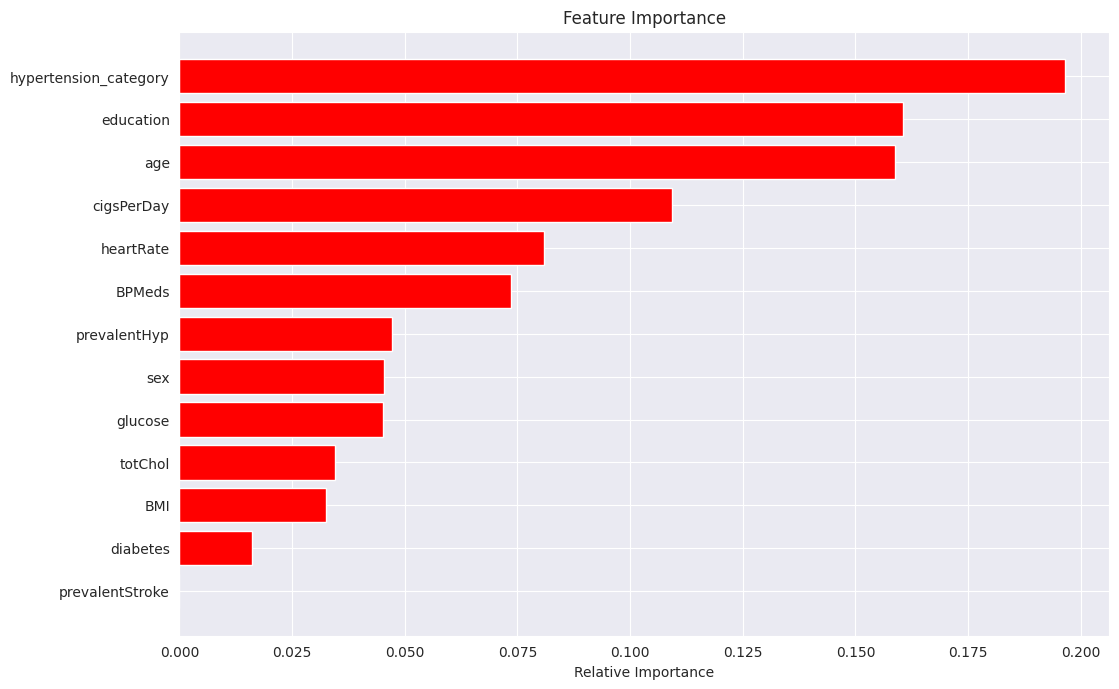

In [ ]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the RandomForestClassifier
xg_model = XGBClassifier()

# Fit the Algorithm
# Grid search
xg_grid = GridSearchCV(estimator=xg_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')

xg_grid1=xg_grid.fit(X_train,y_train)
# Predict on the model
# Making predictions on train and test data

train_class_preds = xg_grid1.predict(X_train)
test_class_preds = xg_grid1.predict(X_test)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.4s
[CV] END max_depth=4, min_sam

In [ ]:
print("Best: %f using %s" % (xg_grid.best_score_, xg_grid.best_params_))

Best: 0.951153 using {'max_depth': 8, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 100}


[[2316   10]
 [  69 2211]]


[Text(0, 0.5, 'NoCHD'), Text(0, 1.5, 'CHD')]

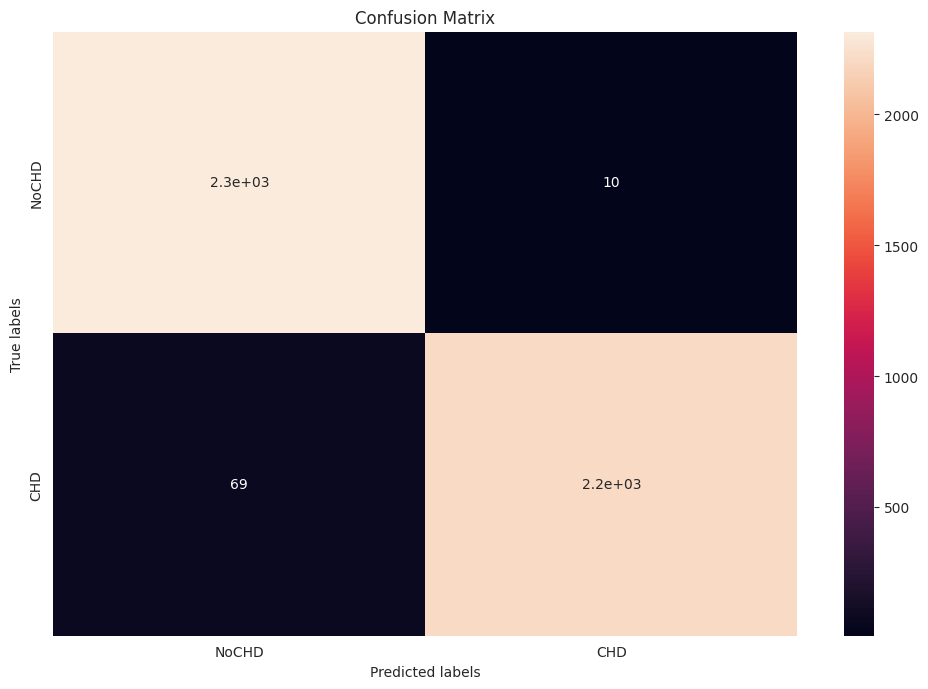

In [ ]:
# Visualizing evaluation Metric Score chart
# Visualizing evaluation Metric Score chart# Get the confusion matrix for both train and test

labels = ['NoCHD', 'CHD']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[513  40]
 [ 91 508]]


[Text(0, 0.5, 'NoCHD'), Text(0, 1.5, 'CHD')]

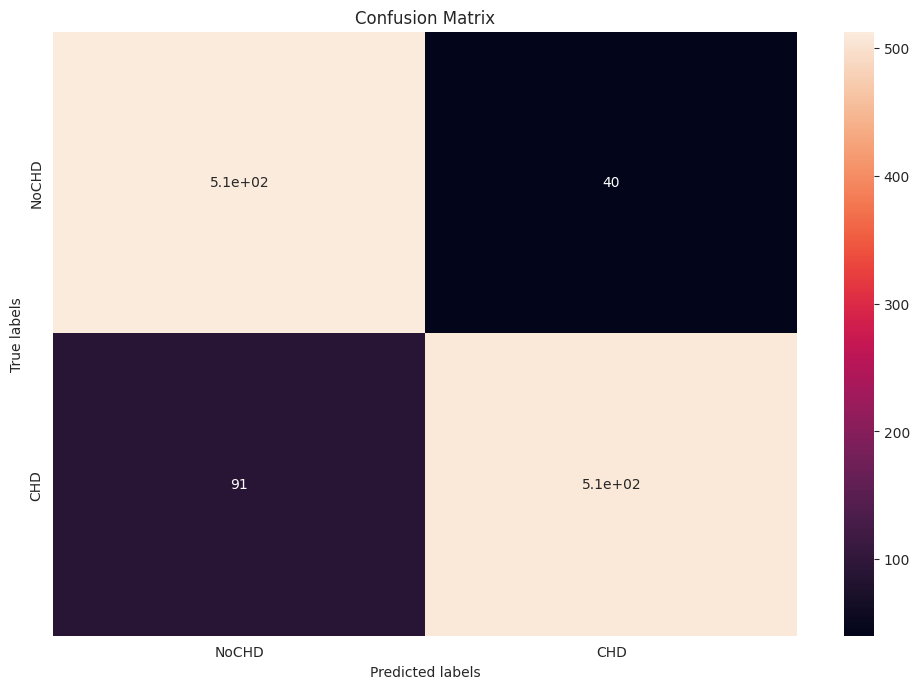

In [ ]:
# Get the confusion matrix for both train and test

labels =['NoCHD', 'CHD']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print(metrics.classification_report(y_train, train_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2326
           1       1.00      0.97      0.98      2280

    accuracy                           0.98      4606
   macro avg       0.98      0.98      0.98      4606
weighted avg       0.98      0.98      0.98      4606

 
roc_auc_score
0.982718807982984


In [ ]:
print(metrics.classification_report( y_test,test_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       553
           1       0.93      0.85      0.89       599

    accuracy                           0.89      1152
   macro avg       0.89      0.89      0.89      1152
weighted avg       0.89      0.89      0.89      1152

 
roc_auc_score
0.8878737014976741


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.  But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. 
Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model. 

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

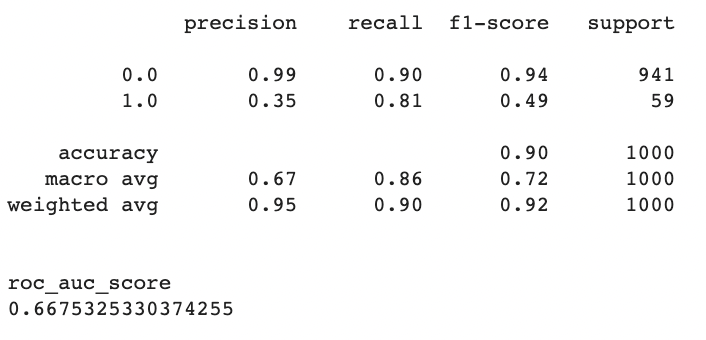

For training dataset, i found precision of 100% and recall of 91% and f1-score of 95% for False Churn customer data. BUt, I am also interested to see the result for Churning cutomer result as I got precision of 46% and recall of 95% and f1-score of 62%. Accuracy is 92% and average percision, recall & f1_score are 73%, 93% and 79% respectively with a roc auc score of 72%.

No improvement or decreament every score is constant as earlier.

For testing dataset, i found precision of 99% and recall of 90% and f1-score of 94% for False Churn customer data. BUt, I am also interested to see the result for Churning cutomer result as I got precision of 35% and recall of 81% and f1-score of 49%. Accuracy is 90% and average percision, recall & f1_score are 67%, 86% and 72% respectively with a roc auc score of 66%.

Quite improvemnt in recall, f1 score as well as average recall & f1 score by 1%.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***